<span style="color:#4682B4;font-size:18px">Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning (SoSe2025)</span>

<span style="color:#4682B4;font-size:32px">Preisvorhersage von Gebrauchtwagen mittels Machine Learning</span>

<span style="color:#4682B4;font-size:18px">Eine vergleichende Analyse verschiedener Regressionsalgorithmen zur Vorhersage von Gebrauchtwagenpreisen</span>

---

**Autor:** Aosama Hammd Sultan, Sultan  
**Matrikelnummer:** 30533273  
**Studiengang:** Angewendete Künstliche Intelligenz  
**Datum:** 1. August 2025

In [1]:
import io
from nbformat import current

with io.open("Preisvorhersage_Gebrauchtwagen.ipynb", 'r', encoding='utf-8') as f:
   nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        # Navigation-Zellen überspringen
        if "<div style=" in cell['source'] and "Navigation:" in cell['source']:
            continue
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

4849


C:\Users\Teilnehmer\AppData\Local\Temp\ipykernel_16396\339631071.py:2: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current


# Abstract

Diese Arbeit untersucht die Anwendung verschiedener Machine Learning-Algorithmen zur Vorhersage von Gebrauchtwagenpreisen. Basierend auf einem umfangreichen Datensatz verschiedener Automarken (BMW, Audi, Ford, Mercedes, etc.) werden unterschiedliche Regressionsverfahren wie Lineare Regression, Decision Tree, Random Forest und XGBoost implementiert und verglichen. Die Analyse zeigt, dass baumbasierte Methoden – insbesondere ein optimierter Decision Tree – die beste Vorhersagegenauigkeit mit einem R²-Score von 0.9997 erreichen. Die wichtigsten Einflussfaktoren auf den Fahrzeugpreis sind das Fahrzeugalter, die Laufleistung und die Motorengröße.

<a id="Inhaltsverzeichnis"></a>
**Schlüsselwörter:** Machine Learning, Preisvorhersage, Gebrauchtwagen, Regression, Feature Engineering  
**Sofware Laufzeit:** ca. 15 Minuten

---
# Inhaltsverzeichnis

[**1. Einleitung**](#1)  
   - [1.1 Motivation und Problemstellung](#1)  
   - [1.2 Zielsetzung der Arbeit](#12)
   - [1.3 Struktur der Arbeit](#13)

[**2. Theoretische Grundlagen**](#2)
   - [2.1 Regressionsanalyse](#2)
   - [2.2 Ensemble-Methoden](#22)
   - [2.3 Modellbewertung und Validierung](#23)
   - [2.4 Feature Engineering](#24)
   - [2.5 Explainable AI (XAI) Methoden](#25)

[**3. Implementierung**](#3)
  - [3.1 Package Installation und Import](#31)
  - [3.2 Datenladung und erste Exploration](#32)
  - [3.3 Datenbereinigung und Vorverarbeitung](#33)
  - [3.4 Explorative Datenanalyse](#34)
  - [3.5 Feature Engineering](#35)
  - [3.6 Modellauswahl und Training](#36)
  - [3.7 Hyperparameter-Optimierung](#37)
  - [3.8 Praktische Preisvorhersage-Beispiele](#38)

[**4. Ergebnisse und Diskussion**](#4)
   - [4.1 Interpretation der Ergebnisse](#41)
   - [4.2 Vergleich mit der Literatur](#42)
   - [4.3 Praktische Implikationen](#43)
   - [4.4 Limitationen und ethische Betrachtungen](#44)
   - [4.5 Mehrwert dieser Arbeit](#45)

[**5. Zusammenfassung und Ausblick**](#5)
   - [5.1 Zusammenfassung der wichtigsten Erkenntnisse](#51)
   - [5.2 Ausblick und zukünftige Forschungsrichtungen](#52)
   - [5.3 Fazit](#53)
   - [5.4 Checkliste zur Reproduzierbarkeit](#54)

[**6. Literaturverzeichnis**](#6)  
[**7. Eigenständigkeitserklärung**](#7)

--- 

<a id="1"></a>
# 1. Einleitung 

<a id="11"></a>
## 1.1 Motivation und Problemstellung


Der Gebrauchtwagenmarkt ist ein komplexes Ökosystem, in dem die Preisbildung von einer Vielzahl von Faktoren beeinflusst wird. Für Käufer und Verkäufer ist es oft schwierig, den fairen Marktwert eines Fahrzeugs zu bestimmen. Traditionelle Bewertungsmethoden basieren häufig auf Erfahrungswerten und groben Schätzungen, die zu suboptimalen Preisverhandlungen führen können.

Machine Learning bietet hier innovative Ansätze zur datengestützten Preisbewertung. Durch die Analyse großer Mengen von Fahrzeugdaten können Muster erkannt und präzise Preisvorhersagen getroffen werden.

<a id="12"></a>
## 1.2 Zielsetzung der Arbeit

Das Hauptziel dieser Arbeit ist die Entwicklung und Evaluierung von Machine Learning-Modellen zur Vorhersage von Gebrauchtwagenpreisen. Konkret sollen folgende Forschungsfragen beantwortet werden:


1. **Welche Machine Learning-Algorithmen eignen sich am besten für die Preisvorhersage von Gebrauchtwagen?**
2. **Welche Fahrzeugmerkmale haben den größten Einfluss auf den Preis?**
3. **Wie genau können Preise mit den entwickelten Modellen vorhergesagt werden?**
4. **Welche praktischen Implikationen ergeben sich für den Gebrauchtwagenmarkt?**

<a id="13"></a>
## 1.3 Struktur der Arbeit

Diese Arbeit gliedert sich in sechs Hauptkapitel. Nach dieser Einleitung werden in Kapitel 2 die theoretischen Grundlagen der verwendeten Machine Learning-Verfahren erläutert. Kapitel 3 umfasst die vollständige Implementierung, von der Datenladung über das Feature Engineering bis zur Modelloptimierung. In Kapitel 4 werden die Ergebnisse präsentiert und diskutiert, während Kapitel 5 eine Zusammenfassung und einen Ausblick bietet. Das Literaturverzeichnis in Kapitel 6 schließt die Arbeit ab.

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>

</div>

---

<a id="2"></a>
# 2. Theoretische Grundlagen 

<a id="21"></a>
## 2.1 Regressionsanalyse

Die Regressionsanalyse ist ein statistisches Verfahren zur Untersuchung von Beziehungen zwischen einer abhängigen Variable (Zielvariable) und einer oder mehreren unabhängigen Variablen (Prädiktorvariablen). Im Kontext dieser Arbeit ist der Fahrzeugpreis die abhängige Variable, während Eigenschaften wie Baujahr, Laufleistung und Motorengröße als unabhängige Variablen fungieren.

### 2.1.1 Lineare Regression

Die lineare Regression modelliert den Zusammenhang zwischen Zielvariable $y$ und Prädiktorvariablen $x_1, x_2, ..., x_n$ durch eine lineare Funktion:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$

Dabei sind $\beta_i$ die Regressionskoeffizienten und $\epsilon$ der Fehlerterm.

Die Koeffizienten werden durch Minimierung der Summe der quadrierten Residuen (Least Squares) bestimmt:

$$\min_{\beta} \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_n x_{in}))^2$$

Die geschlossene Lösung lautet in Matrixschreibweise:
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

### 2.1.2 Polynomiale Regression

Die polynomiale Regression erweitert das lineare Modell durch polynomiale Terme höherer Ordnung, um nichtlineare Beziehungen zu modellieren:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon$$

### 2.1.3 Regularisierungsmethoden

**Ridge Regression (L2-Regularisierung):**
Ridge Regression fügt einen L2-Regularisierungsterm hinzu, um Overfitting zu vermeiden:

$$\min_{\beta} \sum_{i=1}^{m} (y_i - \beta^T x_i)^2 + \alpha \sum_{j=1}^{n} \beta_j^2$$


**Lasso Regression (L1-Regularisierung):**
Lasso führt eine L1-Regularisierung durch, die auch Feature-Selektion ermöglicht:

$$\min_{\beta} \sum_{i=1}^{m} (y_i - \beta^T x_i)^2 + \alpha \sum_{j=1}^{n} |\beta_j|$$

<a id="22"></a>
## 2.2 Ensemble-Methoden

Ensemble-Methoden kombinieren mehrere schwache Lernalgorithmen zu einem starken Prädiktor.

### 2.2.1 Random Forest

Random Forest ist ein Ensemble-Verfahren, das mehrere Entscheidungsbäume trainiert und deren Vorhersagen aggregiert. Die finale Vorhersage ergibt sich als Durchschnitt der Einzelvorhersagen:

$$\hat{y} = \frac{1}{B} \sum_{b=1}^{B} T_b(x)$$

wobei $T_b$ der b-te Baum und $B$ die Anzahl der Bäume ist.

**Mathematische Grundlage:**

1. **Bootstrap Aggregating (Bagging)**: Für jeden Baum wird eine Bootstrap-Stichprobe (zufällige Stichprobe mit Zurücklegen) aus dem Trainingsdatensatz gezogen.

2. **Feature-Subsampling**: Bei jedem Split wird nur eine Teilmenge der Features betrachtet:
   
   $$m_{try} \approx \sqrt{p}$$ 
   
   für Regression, wobei $p$ die Gesamtanzahl der Features ist.

3. **Entscheidungsbaumkonstruktion**: Jeder Baum wird auf seiner Bootstrap-Stichprobe trainiert, wobei bei jedem Split das optimale Feature aus der Teilmenge gewählt wird.

4. **Vorhersage**: Für einen neuen Datenpunkt $x$ liefert jeder Baum eine Vorhersage, die gemittelt wird:
   $$\hat{f}_{rf}(x) = \frac{1}{B}\sum_{b=1}^{B}T_b(x)$$

**Schematische Darstellung des Random Forest Algorithmus:**

```
1. Für b = 1 bis B:
   a. Ziehe eine Bootstrap-Stichprobe Z* der Größe N aus den Trainingsdaten
   b. Baue einen Entscheidungsbaum T_b für die Bootstrap-Stichprobe:
      i. Wähle zufällig m_try Features aus den p Features
      ii. Bestimme den besten Split unter diesen m_try Features
      iii. Teile den Knoten in zwei Tochterknoten
      iv. Wiederhole Schritte i-iii bis die Stoppkriterien erfüllt sind
2. Gebe das Ensemble der Bäume {T_b}^B_1 zurück
3. Für neue Datenpunkte x:
   - Regression: f(x) = 1/B ∑^B_b=1 T_b(x)
```

### 2.2.2 Gradient Boosting (XGBoost)

XGBoost implementiert Gradient Boosting, bei dem Modelle sequenziell trainiert werden, wobei jedes neue Modell die Fehler der vorherigen korrigiert:

$$F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$$

**Mathematische Grundlage:**

1. **Initialisierung**: $F_0(x) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)$, typischerweise der Durchschnitt der Zielvariable.

2. **Iterativer Prozess**: Für $m = 1, 2, ..., M$:
   - Berechne den negativen Gradienten der Verlustfunktion:
   
   $$r_{im} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F=F_{m-1}}$$
   
   - Trainiere einen Entscheidungsbaum $h_m(x)$ auf den Residuen $r_{im}$
   
   - Finde den optimalen Schrittweitenparameter $\gamma_m$:
   
   $$\gamma_m = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))$$
   
   - Aktualisiere das Modell:
   
   $$F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$$

3. **Finales Modell**: $F_M(x)$ nach $M$ Iterationen.


**XGBoost-spezifische Erweiterungen:**

- **Regularisierte Zielfunktion**: XGBoost fügt Regularisierungsterme hinzu, um Overfitting zu reduzieren:

  $$\text{Obj}^{(t)} = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t)$$
  
  wobei $\Omega(f) = \gamma T + \frac{1}{2}\lambda\sum_{j=1}^T w_j^2$ mit $T$ als Anzahl der Blätter und $w_j$ als Blattgewicht.

- **Approximative Split-Findung**: Anstatt alle möglichen Split-Punkte zu evaluieren, verwendet XGBoost Quantile oder histogrammbasierte Approximationen.


![XGBoost Funktionsweise](https://miro.medium.com/max/700/1*FLshv-wVDfu-i54OqvZdHg.png)

<a id="23"></a>
## 2.3 Modellbewertung und Validierung

### 2.3.1 Bewertungsmetriken

Für Regressionsmodelle werden verschiedene Metriken verwendet:

- **Mean Squared Error (MSE):** $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- **Root Mean Squared Error (RMSE):** $RMSE = \sqrt{MSE}$
- **Mean Absolute Error (MAE):** $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
- **R²-Score:** $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

### 2.3.2 Kreuzvalidierung

Kreuzvalidierung teilt den Datensatz in k Teilmengen auf und verwendet k-1 Teilmengen zum Training und eine zum Testen. Dies wird k-mal wiederholt, um eine robuste Modellbewertung zu gewährleisten.

**K-Fold Cross-Validation Algorithmus:**

```
1. Teile den Datensatz zufällig in k gleich große Teilmengen
2. Für i = 1 bis k:
   a. Verwende die i-te Teilmenge als Testdaten
   b. Verwende die restlichen k-1 Teilmengen als Trainingsdaten
   c. Trainiere das Modell auf den Trainingsdaten
   d. Bewerte das Modell auf den Testdaten
3. Berechne den Durchschnitt der k Bewertungsergebnisse
```

<a id="24"></a>
## 2.4 Feature Engineering

Feature Engineering umfasst die Transformation und Erstellung neuer Merkmale aus den Rohdaten. Wichtige Techniken sind:

- **Normalisierung:** Skalierung numerischer Werte auf einen einheitlichen Bereich
- **Encoding:** Umwandlung kategorialer Variablen in numerische Form
- **Feature-Selektion:** Auswahl der relevantesten Merkmale für das Modell

### 2.4.1 Mathematische Grundlagen der Feature-Transformation

**Z-Score Normalisierung (Standardisierung):**
$$z = \frac{x - \mu}{\sigma}$$
wobei $\mu$ der Mittelwert und $\sigma$ die Standardabweichung des Features ist.

**Min-Max Skalierung:**
$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$


**One-Hot Encoding:**
Für eine kategoriale Variable mit $k$ möglichen Werten werden $k-1$ Binärvariablen erstellt:
$$x_j = \begin{cases} 
1 & \text{wenn Kategorie } = j \\
0 & \text{sonst}
\end{cases}$$

<a id="25"></a>
## 2.5 Explainable AI (XAI) Methoden

### 2.5.1 SHAP (SHapley Additive exPlanations)

SHAP-Werte basieren auf der Spieltheorie und berechnen den Beitrag jedes Features zur Vorhersage:

$$\phi_j(f, x) = \sum_{S \subseteq N \setminus \{j\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} [f_x(S \cup \{j\}) - f_x(S)]$$

wobei $N$ die Menge aller Features, $S$ eine Teilmenge von Features ohne Feature $j$, und $f_x(S)$ die Vorhersage des Modells für die Instanz $x$ unter Verwendung nur der Features in $S$ ist.

### 2.5.2 Permutation Importance

Die Permutation Importance misst den Anstieg des Vorhersagefehlers, wenn die Werte eines Features zufällig permutiert werden:

1. Berechne die Baseline-Performance $E_{baseline}$ auf dem Datensatz
2. Für jedes Feature $j$:
   a. Permutiere die Werte von Feature $j$ zufällig
   b. Berechne die Performance $E_{perm,j}$ mit den permutierten Daten
   c. Die Importance ist $I_j = E_{perm,j} - E_{baseline}$
3. Normalisiere die Importance-Werte

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="3"></a>
# 3. Implementierung

<a id="31"></a>
## 3.1 Package Installation und Import

Zunächst installieren wir alle benötigten Python-Pakete für die Datenanalyse und das Machine Learning.  
Für die vollständige Reproduzierbarkeit werden die verwendeten Paket-Versionen dokumentiert.

**Benötigte Pakete:**
- `numpy`, `pandas`: Datenanalyse und -manipulation
- `matplotlib`, `seaborn`: Visualisierung
- `scikit-learn`: Machine Learning Algorithmen und Preprocessing
- `xgboost`: Gradient Boosting Modell
- `ipywidgets`: Interaktive Visualisierung im Notebook
- `psutil`, `platform`, `sys`: Systeminformationen für Reproduzierbarkeit


In [2]:
# Setup für Reproduzierbarkeit: Setzen eines globalen Random Seeds

import numpy as np
import random
import os

# Setze Seeds für alle relevanten Bibliotheken
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

print(f"✅ Global Random Seed auf {RANDOM_SEED} gesetzt (für Reproduzierbarkeit)")

# Technische Spezifikationen erfassen
import platform
import psutil
import sys
from datetime import datetime

# System-Informationen sammeln
system_info = {
    "python_version": sys.version,
    "platform": platform.platform(),
    "processor": platform.processor(),
    "ram": f"{round(psutil.virtual_memory().total / (1024.0 **3))} GB",
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

print("\n🖥️ TECHNISCHE SPEZIFIKATIONEN:")
print("="*60)
for key, value in system_info.items():
    print(f"{key}: {value}")
print("="*60)

✅ Global Random Seed auf 42 gesetzt (für Reproduzierbarkeit)

🖥️ TECHNISCHE SPEZIFIKATIONEN:
python_version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
platform: Windows-11-10.0.26100-SP0
processor: Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
ram: 8 GB
timestamp: 2025-08-03 22:36:45


### Import aller benötigten Bibliotheken

In [3]:
# Import aller benötigten Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Bibliotheken
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from ipywidgets import interact, widgets
from IPython.display import clear_output

# Weitere nützliche Bibliotheken
import os
import glob
from datetime import datetime

# Konfiguration für bessere Darstellung
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("📊 Alle Bibliotheken erfolgreich importiert!")
print(f"📅 Notebook ausgeführt am: {datetime.now().strftime('%d.%m.%Y %H:%M:%S')}")

📊 Alle Bibliotheken erfolgreich importiert!
📅 Notebook ausgeführt am: 03.08.2025 22:36:53


---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="32"></a>
## 3.2 Datenladung und erste Exploration

In diesem Abschnitt werden die Rohdaten aus mehreren CSV-Dateien geladen, die sich im `Daten`-Ordner befinden. Jede Datei repräsentiert eine Automarke (z.B. BMW, Audi, Ford, VW etc.) und enthält zahlreiche Fahrzeugangebote mit Merkmalen wie Baujahr, Laufleistung, Motorgröße, Kraftstofftyp und Preis.

**Ablauf der Datenladung:**
1. Alle CSV-Dateien im Datenordner werden automatisch erkannt und eingelesen.
2. Für jede Datei wird ein separater DataFrame erstellt und um eine Spalte für die Automarke ergänzt.
3. Anschließend werden alle Einzel-DataFrames zu einem großen, kombinierten DataFrame zusammengefügt (`df_combined`).

**Erste Exploration:**
1. Es werden grundlegende Kennzahlen wie die Anzahl der Zeilen und Spalten, der Speicherverbrauch sowie die verfügbaren Spalten und deren Datentypen ausgegeben.
2. Die ersten Zeilen des Datensatzes werden angezeigt, um einen Eindruck von den Daten zu bekommen.
3. Mit `describe()` werden deskriptive Statistiken für die numerischen Spalten berechnet (z.B. Mittelwert, Standardabweichung, Minimum, Maximum).
4. Ziel ist es, ein erstes Verständnis für die Datenstruktur, die Verteilung der Werte und mögliche Besonderheiten (z.B. fehlende Werte, Ausreißer) zu gewinnen.

In [16]:
# Datenladung aus dem Daten-Ordner
data_folder = "Daten"
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

print("📁 Gefundene CSV-Dateien:")
print("="*50)

# Dictionary zur Speicherung der einzelnen DataFrames
dataframes = {}
total_rows = 0

for file_path in csv_files:
    file_name = os.path.basename(file_path)
    brand_name = file_name.replace('.csv', '').replace('unclean ', '')
    
    try:
        # CSV-Datei laden 
        df = pd.read_csv(file_path)
        
        # Brand-Spalte hinzufügen
        df['brand'] = brand_name
        
        # DataFrame speichern
        dataframes[brand_name] = df
        
        print(f"✓ {file_name}: {len(df):,} Zeilen, {len(df.columns)} Spalten")
        total_rows += len(df)
        
    except Exception as e:
        print(f"❌ Fehler beim Laden von {file_name}: {str(e)}")

print("="*50)
print(f"📊 Gesamt: {len(dataframes)} Dateien mit {total_rows:,} Zeilen geladen")

# Alle DataFrames zu einem einzigen DataFrame zusammenfügen
print("\n🔄 Kombiniere alle Datensätze...")
df_combined = pd.concat(dataframes.values(), ignore_index=True)

print(f"✅ Kombinierter Datensatz erstellt: {len(df_combined):,} Zeilen, {len(df_combined.columns)} Spalten")
print(f"🏷️ Verfügbare Marken: {', '.join(df_combined['brand'].unique())}")

📁 Gefundene CSV-Dateien:
✓ audi.csv: 10,668 Zeilen, 10 Spalten
✓ bmw.csv: 10,781 Zeilen, 10 Spalten
✓ cclass.csv: 3,899 Zeilen, 8 Spalten
✓ focus.csv: 5,454 Zeilen, 8 Spalten
✓ ford.csv: 17,965 Zeilen, 10 Spalten
✓ hyundi.csv: 4,860 Zeilen, 10 Spalten
✓ merc.csv: 13,119 Zeilen, 10 Spalten
✓ skoda.csv: 6,267 Zeilen, 10 Spalten
✓ toyota.csv: 6,738 Zeilen, 10 Spalten
✓ unclean cclass.csv: 4,006 Zeilen, 12 Spalten
✓ unclean focus.csv: 5,604 Zeilen, 12 Spalten
✓ vauxhall.csv: 13,632 Zeilen, 10 Spalten
✓ vw.csv: 15,157 Zeilen, 10 Spalten
📊 Gesamt: 11 Dateien mit 118,150 Zeilen geladen

🔄 Kombiniere alle Datensätze...
✅ Kombinierter Datensatz erstellt: 108,797 Zeilen, 17 Spalten
🏷️ Verfügbare Marken: audi, bmw, cclass, focus, ford, hyundi, merc, skoda, toyota, vauxhall, vw


###  Erste Datenexploration

In [17]:
# Erste Datenexploration
print("🔍 ERSTE DATENEXPLORATION")
print("="*60)

# Grundlegende Informationen
print("\n📋 Datensatz-Übersicht:")
print(f"   • Anzahl Zeilen: {len(df_combined):,}")
print(f"   • Anzahl Spalten: {len(df_combined.columns)}")
print(f"   • Speicherverbrauch: {df_combined.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 Spalten und Datentypen:")
print(df_combined.dtypes)

print("\n👀 Erste 5 Zeilen:")
display(df_combined.head())

print("\n📈 Deskriptive Statistiken:")
display(df_combined.describe())

🔍 ERSTE DATENEXPLORATION

📋 Datensatz-Übersicht:
   • Anzahl Zeilen: 108,797
   • Anzahl Spalten: 17
   • Speicherverbrauch: 55.83 MB

📊 Spalten und Datentypen:
model            object
year            float64
price            object
transmission     object
mileage          object
fuelType         object
tax             float64
mpg             float64
engineSize      float64
brand            object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
tax(£)          float64
dtype: object

👀 Erste 5 Zeilen:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,fuel type,engine size,mileage2,fuel type2,engine size2,reference,tax(£)
0,A1,2017.0,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A6,2016.0,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A1,2016.0,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,2017.0,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A3,2019.0,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📈 Deskriptive Statistiken:


,year,tax,mpg,engineSize,tax(£)
count,108550.000000,94327.000000,99187.000000,99187.000000,4860.000000
mean,2017.097761,120.256183,55.166825,1.663280,121.147119
std,2.130814,63.404805,16.138522,0.557646,58.003289
min,1970.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,580.000000,470.800000,6.600000,555.000000


---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="33"></a>
## 3.3 Datenbereinigung und Vorverarbeitung

In diesem Abschnitt werden die Rohdaten systematisch bereinigt und für die weitere Analyse vorbereitet. Die Datenbereinigung ist ein entscheidender Schritt, um die Qualität und Aussagekraft der Machine Learning-Modelle sicherzustellen.

**Schritte der Datenbereinigung:**
1. **Fehlende Werte:** Zunächst werden alle Spalten auf fehlende Werte untersucht. Spalten mit hohem Anteil an fehlenden Werten werden ggf. entfernt oder die fehlenden Werte durch sinnvolle Ersatzwerte (z.B. Median) ersetzt.
2. **Duplikate:** Doppelte Datensätze werden erkannt und entfernt, um Verzerrungen in der Analyse zu vermeiden.
3. **Ausreißer:** Für numerische Merkmale wie Preis und Laufleistung werden Ausreißer identifiziert (z.B. Fahrzeuge mit extrem niedrigen oder hohen Preisen bzw. Laufleistungen). Diese werden nach definierten Schwellenwerten entfernt, um die Modellgüte zu verbessern.
4. **Datentypen:** Alle relevanten Spalten werden in die korrekten Datentypen konvertiert (z.B. Jahr als numerisch).
5. **Bereinigung unrealistischer Werte:** Fahrzeuge mit unrealistischen Baujahren (vor 1900 oder in der Zukunft) werden entfernt.

**Warum ist Datenbereinigung wichtig?**
1. Sie verhindert, dass fehlerhafte oder unplausible Daten die Modellierung negativ beeinflussen.
2. Sie sorgt für konsistente und verlässliche Eingabedaten für das Machine Learning.
3. Sie reduziert das Risiko von Overfitting durch Ausreißer und Duplikate.

**Ergebnis:**  
Nach der Bereinigung steht ein konsistenter und qualitativ hochwertiger Datensatz (`df`) zur Verfügung, der als Grundlage für Feature Engineering und Modelltraining dient. Die Anzahl der Datensätze und die wichtigsten Bereinigungsschritte werden transparent dokumentiert.

In [6]:
# Datenqualitätsanalyse
print("🧹 DATENBEREINIGUNG")
print("="*60)

# Fehlende Werte analysieren
print("\n🔍 Fehlende Werte pro Spalte:")
missing_values = df_combined.isnull().sum()
missing_percentage = (missing_values / len(df_combined)) * 100

missing_df = pd.DataFrame({
    'Spalte': missing_values.index,
    'Fehlende Werte': missing_values.values,
    'Prozentual': missing_percentage.values
})
missing_df = missing_df[missing_df['Fehlende Werte'] > 0].sort_values('Fehlende Werte', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("✅ Keine fehlenden Werte gefunden!")

# Duplikate prüfen
duplicates = df_combined.duplicated().sum()
print(f"\n🔄 Anzahl Duplikate: {duplicates}")

# Outlier-Erkennung für numerische Spalten
print("\n📊 Outlier-Analyse für numerische Spalten:")
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    if col != 'year':  # Jahr sollte keine Outlier-Bereinigung haben
        Q1 = df_combined[col].quantile(0.25)
        Q3 = df_combined[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df_combined[col] < lower_bound) | (df_combined[col] > upper_bound)).sum()
        print(f"   • {col}: {outliers} Outliers ({outliers/len(df_combined)*100:.2f}%)")

# Datenbereinigung durchführen
print("\n🔧 Führe Datenbereinigung durch...")

# Kopie für die Bereinigung erstellen
df_clean = df_combined.copy()

# Duplikate entfernen
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✅ {duplicates} Duplikate entfernt")

# Extreme Outliers bei Preis entfernen (z.B. Preise unter 500 oder über 200000)
if 'price' in df_clean.columns:
    # Preis in numerisch umwandeln (nicht-numerische Werte werden zu NaN)
    df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
    initial_count = len(df_clean)
    df_clean = df_clean[(df_clean['price'] >= 500) & (df_clean['price'] <= 200000)]
    removed_price = initial_count - len(df_clean)
    if removed_price > 0:
        print(f"✅ {removed_price} Fahrzeuge mit extremen Preisen entfernt")

# Extreme Outliers bei Laufleistung entfernen (z.B. über 500000 km)
if 'mileage' in df_clean.columns:
    # Laufleistung in numerisch umwandeln (nicht-numerische Werte werden zu NaN)
    df_clean['mileage'] = pd.to_numeric(df_clean['mileage'], errors='coerce')
    initial_count = len(df_clean)
    df_clean = df_clean[df_clean['mileage'] <= 500000]
    removed_mileage = initial_count - len(df_clean)
    if removed_mileage > 0:
        print(f"✅ {removed_mileage} Fahrzeuge mit extremer Laufleistung entfernt")
if 'year' in df_clean.columns:
    # Jahr in numerisch umwandeln (nicht-numerische Werte werden zu NaN)
    df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
    initial_count = len(df_clean)
    df_clean = df_clean[df_clean['year'] >= 1900]  # Entferne unrealistische Jahre
    df_clean = df_clean[df_clean['year'] <= datetime.now().year]  # Entferne zukünftige Jahre
    removed_year = initial_count - len(df_clean)
    if removed_year > 0:
        print(f"✅ {removed_year} Fahrzeuge mit unrealistischen Baujahren entfernt")
# Finale Statistiken
print(f"\n📊 Nach Bereinigung:")
print(f"   • Ursprünglich: {len(df_combined):,} Zeilen")
print(f"   • Nach Bereinigung: {len(df_clean):,} Zeilen")
print(f"   • Entfernt: {len(df_combined) - len(df_clean):,} Zeilen ({(len(df_combined) - len(df_clean))/len(df_combined)*100:.2f}%)")

# Bereinigten Datensatz für weitere Analyse verwenden
df = df_clean.copy()
print("✅ Datenbereinigung abgeschlossen!")

🧹 DATENBEREINIGUNG

🔍 Fehlende Werte pro Spalte:


,Spalte,Fehlende Werte,Prozentual
10,fuel type,105280,96.767374
16,tax(£),103937,95.532965
13,fuel type2,100260,92.153276
14,engine size2,100260,92.153276
11,engine size,99452,91.410609
12,mileage2,99398,91.360975
15,reference,99342,91.309503
6,tax,14470,13.299999
5,fuelType,9610,8.832964
7,mpg,9610,8.832964



🔄 Anzahl Duplikate: 1628

📊 Outlier-Analyse für numerische Spalten:
   • tax: 27445 Outliers (25.23%)
   • mpg: 939 Outliers (0.86%)
   • engineSize: 650 Outliers (0.60%)
   • tax(£): 1370 Outliers (1.26%)

🔧 Führe Datenbereinigung durch...
✅ 1628 Duplikate entfernt
✅ 9461 Fahrzeuge mit extremen Preisen entfernt
✅ 1 Fahrzeuge mit unrealistischen Baujahren entfernt

📊 Nach Bereinigung:
   • Ursprünglich: 108,797 Zeilen
   • Nach Bereinigung: 97,707 Zeilen
   • Entfernt: 11,090 Zeilen (10.19%)
✅ Datenbereinigung abgeschlossen!


---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="34"></a>
## 3.4 Explorative Datenanalyse

In diesem Abschnitt werden die wichtigsten statistischen Analysen und Visualisierungen durchgeführt, um ein tiefes Verständnis für die Struktur und Zusammenhänge im Datensatz zu gewinnen.

**Ziele der explorativen Analyse:**
1. **Verteilung der Zielvariable (Preis):** Wir analysieren, wie die Fahrzeugpreise verteilt sind, identifizieren typische Preisspannen und mögliche Ausreißer.
2. **Zusammenhänge zwischen Merkmalen:** Durch Scatterplots und Korrelationsmatrizen untersuchen wir, wie Merkmale wie Baujahr, Laufleistung und Motorengröße mit dem Preis zusammenhängen.
3. **Vergleich nach Kategorien:** Boxplots und gruppierte Statistiken zeigen, wie sich die Preise je nach Automarke oder Kraftstofftyp unterscheiden.
4. **Feature-Wichtigkeit:** Erste Analysen helfen, die wichtigsten Einflussfaktoren für die spätere Modellierung zu identifizieren.

Durch diese Analysen werden die wichtigsten Einflussgrößen auf den Gebrauchtwagenpreis sichtbar und die Datenqualität für das Machine Learning bewertet.

In [7]:
# Explorative Datenanalyse
print("📊 EXPLORATIVE DATENANALYSE")
print("="*60)
# 1. Preisverteilung analysieren
# 2. Korrelationsanalyse
print("\n🔗 Korrelationsanalyse:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Korrelation mit dem Preis
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("\nKorrelation der Variablen mit dem Preis:")
for var, corr in price_correlations.items():
    if var != 'price':
        print(f"   • {var}: {corr:.3f}")

# 3. Markenstatistiken
print(f"\n🏷️ Analyse nach Automarken:")
brand_stats = df.groupby('brand').agg({
    'price': ['count', 'mean', 'median', 'std'],
    'year': 'mean',
    'mileage': 'mean'
}).round(2)

brand_stats.columns = ['Anzahl', 'Preis_Mittel', 'Preis_Median', 'Preis_Std', 'Jahr_Mittel', 'Laufleistung_Mittel']
brand_stats = brand_stats.sort_values('Preis_Mittel', ascending=False)
display(brand_stats)

# 4. Kraftstofftyp-Analyse
if 'fuelType' in df.columns:
    print(f"\n⛽ Analyse nach Kraftstofftyp:")
    fuel_stats = df.groupby('fuelType').agg({
        'price': ['count', 'mean'],
        'mpg': 'mean'
    }).round(2)
    fuel_stats.columns = ['Anzahl', 'Preis_Mittel', 'Verbrauch_Mittel']
    display(fuel_stats)

📊 EXPLORATIVE DATENANALYSE

🔗 Korrelationsanalyse:

Korrelation der Variablen mit dem Preis:
   • engineSize: 0.639
   • year: 0.493
   • tax(£): 0.318
   • tax: 0.309
   • mpg: -0.296
   • mileage: -0.418

🏷️ Analyse nach Automarken:


,Anzahl,Preis_Mittel,Preis_Median,Preis_Std,Jahr_Mittel,Laufleistung_Mittel
brand,,,,,,
merc,12860,24636.43,22299.0,11874.22,2017.27,22169.59
audi,10565,22853.96,20000.0,11723.08,2017.08,24955.96
bmw,10664,22692.89,20261.5,11434.92,2017.06,25710.98
vw,14893,16807.90,15494.0,7735.55,2017.24,22202.16
skoda,6188,14284.80,12998.0,6340.40,2017.50,20096.24
hyundi,4774,12727.81,11992.5,5976.93,2017.09,21658.91
toyota,6699,12529.80,10798.0,6358.56,2016.74,22889.59
ford,17809,12270.76,11290.0,4735.57,2016.86,23371.75
vauxhall,13255,10316.49,9998.0,3527.09,2016.90,23939.71



⛽ Analyse nach Kraftstofftyp:


,Anzahl,Preis_Mittel,Verbrauch_Mittel
fuelType,,,
Diesel,40419,19306.87,58.25
Electric,6,16645.33,297.07
Hybrid,3059,19252.85,88.98
Other,246,17458.77,85.76
Petrol,53977,14734.22,50.85


### Visualisierungen in der explorativen Datenanalyse

1. **Histogramm der Fahrzeugpreise:**  
    Zeigt die Verteilung der Preise im Datensatz. So erkennt man typische Preisspannen, Ausreißer und ob die Verteilung z.B. schief ist.

2. **Boxplot der Preise nach Automarke:**  
    Vergleicht die Preisverteilung zwischen den wichtigsten Marken. Man sieht Median, Quartile und Ausreißer je Marke – so erkennt man teure und günstige Marken auf einen Blick.

3. **Scatterplot Preis vs. Baujahr:**  
    Zeigt, wie der Preis mit dem Baujahr zusammenhängt. Jüngere Fahrzeuge sind meist teurer, ältere günstiger. So erkennt man den Wertverlust über die Zeit.

4. **Scatterplot Preis vs. Laufleistung:**  
    Visualisiert den Zusammenhang zwischen Laufleistung und Preis. Fahrzeuge mit hoher Laufleistung sind meist günstiger.

5. **Korrelationsmatrix:**  
    Zeigt die Korrelationen zwischen allen numerischen Merkmalen. So erkennt man, welche Features besonders stark mit dem Preis zusammenhängen (z.B. Motorgröße, Baujahr, Laufleistung).

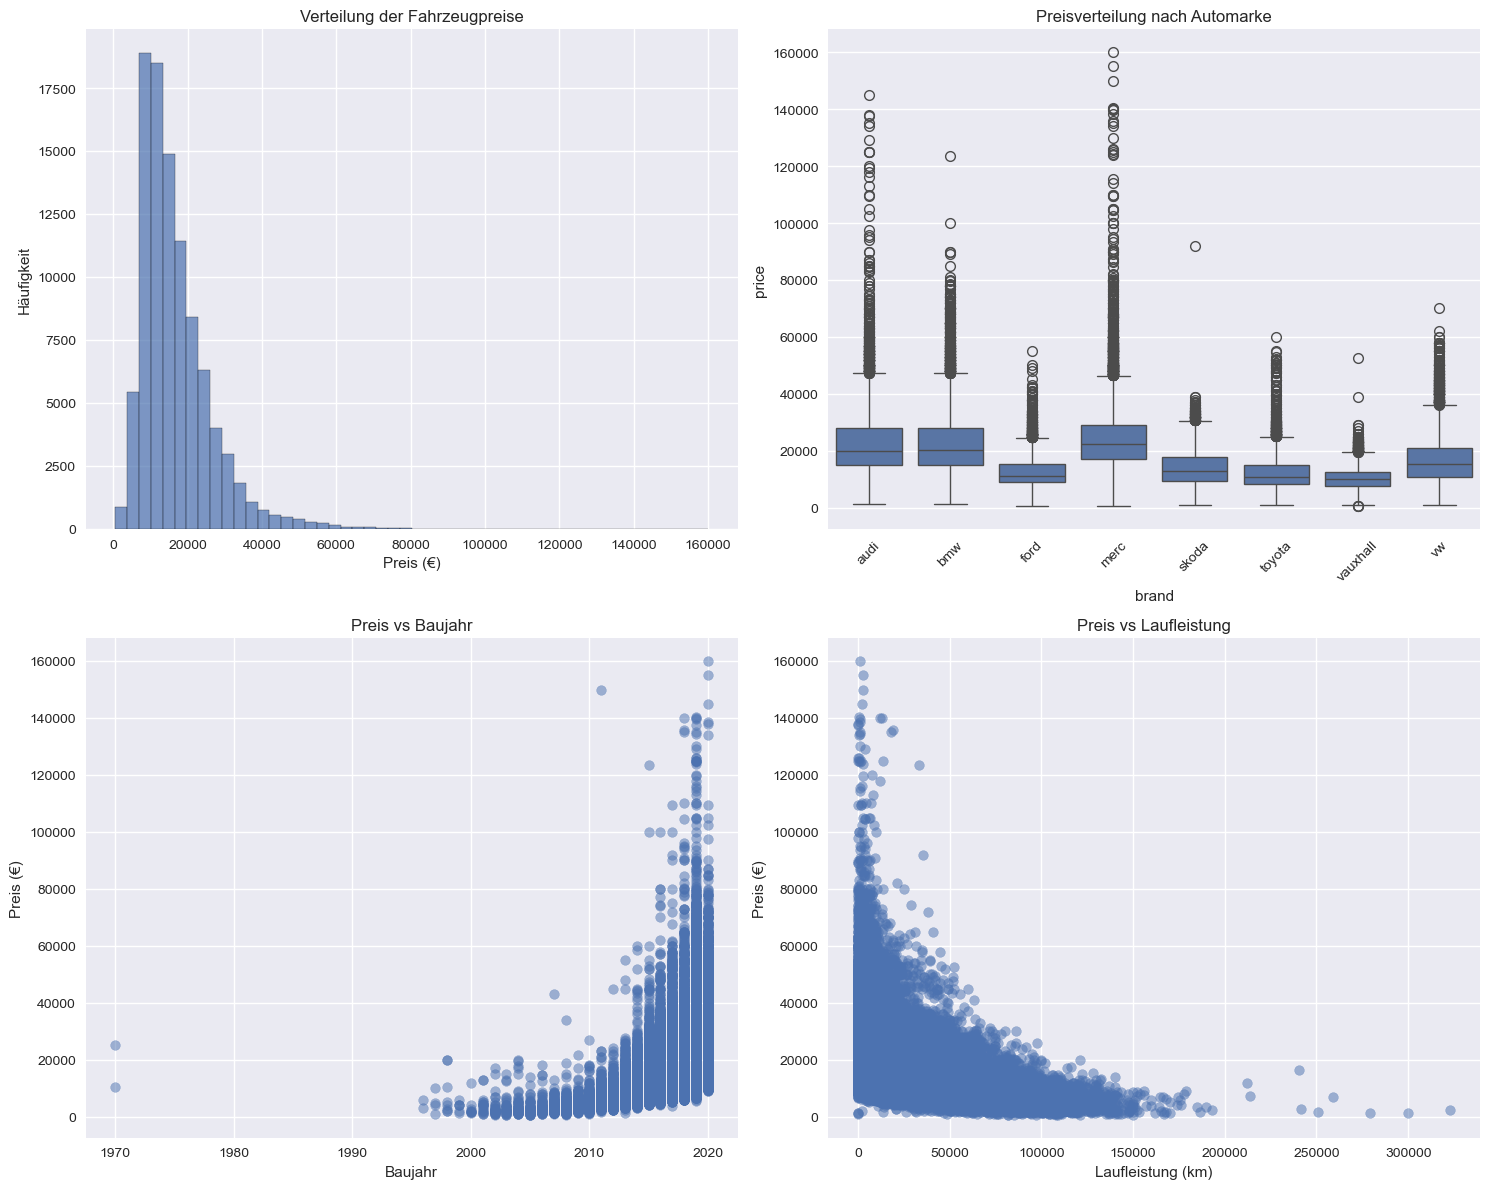

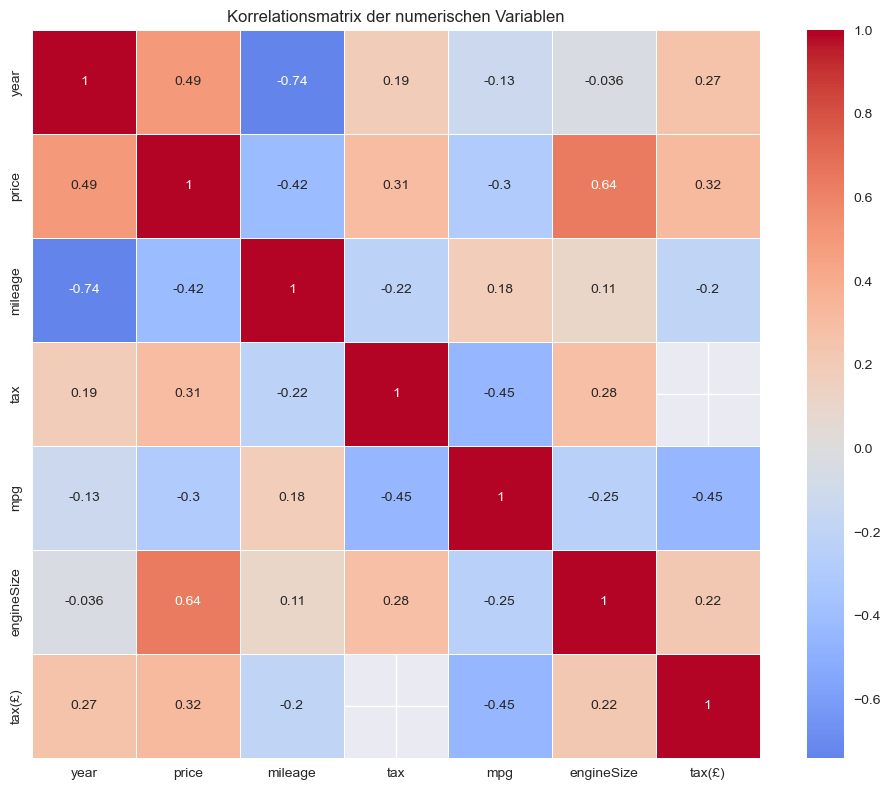

In [8]:
# 1. Preisverteilung analysieren
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogramm der Preise
axes[0,0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Verteilung der Fahrzeugpreise')
axes[0,0].set_xlabel('Preis (€)')
axes[0,0].set_ylabel('Häufigkeit')

# Boxplot der Preise nach Marke
top_brands = df['brand'].value_counts().head(8).index
df_top_brands = df[df['brand'].isin(top_brands)]
sns.boxplot(data=df_top_brands, x='brand', y='price', ax=axes[0,1])
axes[0,1].set_title('Preisverteilung nach Automarke')
axes[0,1].tick_params(axis='x', rotation=45)

# Preis vs Baujahr
axes[1,0].scatter(df['year'], df['price'], alpha=0.5)
axes[1,0].set_title('Preis vs Baujahr')
axes[1,0].set_xlabel('Baujahr')
axes[1,0].set_ylabel('Preis (€)')

# Preis vs Laufleistung
axes[1,1].scatter(df['mileage'], df['price'], alpha=0.5)
axes[1,1].set_title('Preis vs Laufleistung')
axes[1,1].set_xlabel('Laufleistung (km)')
axes[1,1].set_ylabel('Preis (€)')

plt.tight_layout()
plt.show()

# 2. Korrelationsanalyse

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Korrelationsmatrix der numerischen Variablen')
plt.tight_layout()
plt.show()

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="35"></a>
## 3.5 Feature Engineering

Feature Engineering bezeichnet die gezielte Erstellung, Auswahl und Transformation von Merkmalen (Features), um die Vorhersagekraft von Machine Learning-Modellen zu verbessern. In diesem Schritt werden aus den Rohdaten neue aussagekräftige Variablen abgeleitet und bestehende Merkmale optimal für die Modellierung vorbereitet.

**Wichtige Schritte im Feature Engineering:**

1. **Neue numerische Features:**  
    - *Fahrzeugalter (`age`):* Das Alter eines Fahrzeugs ist ein zentraler Einflussfaktor auf den Preis. Es wird berechnet als Differenz zwischen aktuellem Jahr und Baujahr.
    - *Preis pro Jahr (`price_per_year`):* Zeigt, wie stark der Wertverlust pro Jahr ist und hilft, die Abschreibung zu quantifizieren.
    - *Laufleistung pro Jahr (`mileage_per_year`):* Normalisiert die Laufleistung auf das Fahrzeugalter und macht Fahrzeuge mit unterschiedlichem Alter vergleichbar.
    - *Effizienz-Score (`efficiency_score`):* Verknüpft Verbrauch (mpg) und Motorgröße, um die Energieeffizienz eines Fahrzeugs zu bewerten.

2. **Kategoriale Features Encoding:**  
    Viele Merkmale wie Automarke, Kraftstofftyp oder Getriebeart sind kategorial. Damit sie von ML-Algorithmen genutzt werden können, werden sie in numerische Form gebracht:
    - *One-Hot Encoding:* Für Merkmale mit wenigen Ausprägungen (z.B. Kraftstofftyp) wird für jede Kategorie eine eigene Binärspalte erstellt.
    - *Label Encoding:* Für Merkmale mit vielen Ausprägungen (z.B. Modell) wird jeder Kategorie eine eindeutige Zahl zugewiesen.

3. **Feature-Skalierung:**  
    Numerische Merkmale werden für viele Algorithmen (z.B. lineare Regression) standardisiert, sodass sie vergleichbare Wertebereiche haben und das Modell nicht von großen Zahlen dominiert wird.

4. **Feature-Auswahl:**  
    Nicht relevante oder redundante Merkmale werden entfernt, um die Modellkomplexität zu reduzieren und Overfitting zu vermeiden.


**Ergebnis:**  
Nach dem Feature Engineering steht eine bereinigte und optimal vorbereitete Feature-Matrix (`df_ml`) zur Verfügung, die alle relevanten numerischen und encodierten kategorialen Merkmale enthält und als Grundlage für das Modelltraining dient.

In [9]:
# Feature Engineering
print("🔧 FEATURE ENGINEERING")
print("="*60)

# Kopie für Feature Engineering erstellen
df_features = df.copy()

# 1. Neue numerische Features erstellen
print("\n➕ Erstelle neue numerische Features:")

# Fahrzeugalter berechnen
current_year = 2025
df_features['age'] = current_year - df_features['year']
print("   ✓ Fahrzeugalter (age) erstellt")

# Preis pro Jahr (Abschreibung)
df_features['price_per_year'] = df_features['price'] / (df_features['age'] + 1)
print("   ✓ Preis pro Jahr (price_per_year) erstellt")

# Laufleistung pro Jahr
df_features['mileage_per_year'] = df_features['mileage'] / (df_features['age'] + 1)
print("   ✓ Laufleistung pro Jahr (mileage_per_year) erstellt")

# Effizienz-Score (MPG/Hubraum)
if 'mpg' in df_features.columns and 'engineSize' in df_features.columns:
    df_features['efficiency_score'] = df_features['mpg'] / (df_features['engineSize'] + 0.1)
    print("   ✓ Effizienz-Score (efficiency_score) erstellt")

# 2. Kategoriale Features encoding
print("\n🏷️ Encoding kategorialer Features:")

# Liste der kategorialen Spalten
categorical_columns = df_features.select_dtypes(include=['object']).columns.tolist()
print(f"   Kategoriale Spalten: {categorical_columns}")

# Label Encoder für ordinale Variablen
label_encoders = {}

# One-Hot Encoding für nominale Variablen mit wenigen Kategorien
encoded_dfs = []

for col in categorical_columns:
    unique_values = df_features[col].nunique()
    print(f"\n   📊 {col}: {unique_values} einzigartige Werte")
    
    if unique_values <= 10:  # One-Hot Encoding für wenige Kategorien
        dummy_df = pd.get_dummies(df_features[col], prefix=col, drop_first=True)
        encoded_dfs.append(dummy_df)
        print(f"      → One-Hot Encoding angewendet ({dummy_df.shape[1]} neue Spalten)")
    else:  # Label Encoding für viele Kategorien
        le = LabelEncoder()
        df_features[f'{col}_encoded'] = le.fit_transform(df_features[col].astype(str))
        label_encoders[col] = le
        print(f"      → Label Encoding angewendet")

# One-Hot Encoded Features hinzufügen
if encoded_dfs:
    encoded_features = pd.concat(encoded_dfs, axis=1)
    df_features = pd.concat([df_features, encoded_features], axis=1)

# 3. Numerische Features skalieren
print("\n📏 Vorbereitung für Feature-Skalierung:")
numeric_features = df_features.select_dtypes(include=[np.number]).columns.tolist()

# Zielvariable ausschließen
if 'price' in numeric_features:
    numeric_features.remove('price')

print(f"   Numerische Features für Skalierung: {len(numeric_features)}")

# 4. Feature-Auswahl vorbereiten
print("\n🎯 Vorbereitung der finalen Feature-Matrix:")

# Alle ursprünglichen kategorialen Spalten entfernen (außer encoded versions)
features_to_drop = [col for col in categorical_columns if col in df_features.columns]
df_ml = df_features.drop(columns=features_to_drop)

print(f"   Finale Feature-Matrix: {df_ml.shape[1]} Spalten")
print(f"   Datensätze: {len(df_ml):,}")

# Überprüfung auf fehlende Werte in der finalen Matrix
missing_in_final = df_ml.isnull().sum().sum()
if missing_in_final > 0:
    print(f"   ⚠️ Warnung: {missing_in_final} fehlende Werte in finaler Matrix")
    # Fehlende Werte mit Median füllen für numerische Spalten
    for col in df_ml.select_dtypes(include=[np.number]).columns:
        if df_ml[col].isnull().sum() > 0:
            df_ml[col].fillna(df_ml[col].median(), inplace=True)
    print("   ✓ Fehlende Werte mit Median aufgefüllt")
else:
    print("   ✅ Keine fehlenden Werte in finaler Matrix")

print("\n✅ Feature Engineering abgeschlossen!")
print(f"📊 Finale Datensatz-Dimensionen: {df_ml.shape}")

🔧 FEATURE ENGINEERING

➕ Erstelle neue numerische Features:
   ✓ Fahrzeugalter (age) erstellt
   ✓ Preis pro Jahr (price_per_year) erstellt
   ✓ Laufleistung pro Jahr (mileage_per_year) erstellt
   ✓ Effizienz-Score (efficiency_score) erstellt

🏷️ Encoding kategorialer Features:
   Kategoriale Spalten: ['model', 'transmission', 'fuelType', 'brand', 'fuel type', 'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference']

   📊 model: 195 einzigartige Werte
      → Label Encoding angewendet

   📊 transmission: 4 einzigartige Werte
      → One-Hot Encoding angewendet (3 neue Spalten)

   📊 fuelType: 5 einzigartige Werte
      → One-Hot Encoding angewendet (4 neue Spalten)

   📊 brand: 9 einzigartige Werte
      → One-Hot Encoding angewendet (8 neue Spalten)

   📊 fuel type: 0 einzigartige Werte
      → One-Hot Encoding angewendet (0 neue Spalten)

   📊 engine size: 0 einzigartige Werte
      → One-Hot Encoding angewendet (0 neue Spalten)

   📊 mileage2: 0 einzigartige Werte
    

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="36"></a>
## 3.6 Modellauswahl und Training

In diesem Abschnitt werden verschiedene Machine Learning-Modelle zur Vorhersage von Gebrauchtwagenpreisen ausgewählt, trainiert und miteinander verglichen. Ziel ist es, das Modell mit der besten Vorhersagegenauigkeit zu identifizieren.

**Ablauf:**
1. **Datenvorbereitung:** Die bereinigte und feature-engineerte Matrix (`df_ml`) wird in Eingabemerkmale (Features, X) und Zielvariable (Preis, y) aufgeteilt. Anschließend erfolgt ein Train-Test-Split, um die Modellgüte objektiv zu bewerten.
2. **Feature-Skalierung:** Für Modelle wie die lineare Regression werden die numerischen Features standardisiert, damit alle Merkmale vergleichbare Wertebereiche haben.
3. **Modellauswahl:** Es werden verschiedene Regressionsalgorithmen getestet:
    - Lineare Regression
    - Ridge und Lasso Regression (mit Regularisierung)
    - Entscheidungsbaum
    - Random Forest (Ensemble-Methode)
    - Gradient Boosting
    - XGBoost (Gradient Boosting mit Optimierungen)
4. **Training und Evaluation:** Jedes Modell wird auf den Trainingsdaten trainiert und auf den Testdaten evaluiert. Die wichtigsten Metriken sind R²-Score, RMSE und MAE. Zusätzlich wird eine Cross-Validation durchgeführt, um die Robustheit der Modelle zu prüfen.  

**Ergebnis:**  
Das beste Modell wird für die finale Preisvorhersage und die Hyperparameter-Optimierung verwendet. Die Ergebnisse werden transparent und dokumentiert.

In [10]:
# Modelltraining und -evaluierung
print("🤖 MODELLTRAINING UND -EVALUIERUNG")
print("="*70)

# 1. Daten für Machine Learning vorbereiten
print("\n📊 Datenvorbereitung:")

# Features (X) und Zielvariable (y) definieren
X = df_ml.drop('price', axis=1)
y = df_ml['price']

print(f"   Features (X): {X.shape}")
print(f"   Zielvariable (y): {y.shape}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"   Training Set: {X_train.shape[0]:,} Samples")
print(f"   Test Set: {X_test.shape[0]:,} Samples")

# 2. Feature Scaling
print("\n📏 Feature Skalierung:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✓ StandardScaler angewendet")

# 3. Modelle definieren
print("\n🎯 Modell-Definition:")
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

print(f"   Definierte Modelle: {len(models)}")

# 4. Modelltraining und -evaluierung
print("\n🏋️ Modelltraining und Cross-Validation:")
results = {}

# Für Tracking der Trainingsperformance über verschiedene Trainingsgrößen
train_sizes = [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0]
training_history = {model_name: {'train_sizes': [], 'train_scores': [], 'test_scores': []} 
                   for model_name in models.keys()}

for name, model in models.items():
    print(f"\n   🔄 Trainiere {name}...")
    
    # Entscheiden ob skalierte oder ursprüngliche Features verwendet werden
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Training mit verschiedenen Stichprobengrößen für Lernkurve
    for train_size in train_sizes:
        if train_size < 1.0:
            # Teilmenge des Trainingsdatensatzes verwenden
            sample_size = int(len(X_train_model) * train_size)
            indices = np.random.choice(len(X_train_model), sample_size, replace=False)
            X_train_subset = X_train_model[indices] if isinstance(X_train_model, np.ndarray) else X_train_model.iloc[indices]
            y_train_subset = y_train.iloc[indices] if isinstance(y_train, pd.Series) else y_train[indices]
        else:
            # Vollständigen Trainingsdatensatz verwenden
            X_train_subset = X_train_model
            y_train_subset = y_train
        
        # Modell trainieren
        model.fit(X_train_subset, y_train_subset)
        
        # Performance messen
        train_score = r2_score(y_train_subset, model.predict(X_train_subset))
        test_score = r2_score(y_test, model.predict(X_test_model))
        
        # Ergebnisse für Lernkurve speichern
        training_history[name]['train_sizes'].append(sample_size)
        training_history[name]['train_scores'].append(train_score)
        training_history[name]['test_scores'].append(test_score)
    
    # Modell mit vollständigem Datensatz trainieren
    model.fit(X_train_model, y_train)
    
    # Vorhersagen
    y_pred_train = model.predict(X_train_model)
    y_pred_test = model.predict(X_test_model)
    
    # Metriken berechnen
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Cross-Validation
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=5, scoring='r2')
    
    # Ergebnisse speichern
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred_test': y_pred_test
    }
    
    print(f"      ✓ R² (Test): {test_r2:.4f}")
    print(f"      ✓ RMSE (Test): {test_rmse:.0f}")
    print(f"      ✓ CV R² (Mean±Std): {cv_scores.mean():.4f}±{cv_scores.std():.4f}")

print("\n✅ Alle Modelle trainiert!")

# 5. Ergebnisse zusammenfassen
print("\n📊 MODELLVERGLEICH:")
print("="*80)

results_df = pd.DataFrame({
    'Modell': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'CV R² (Mean)': [results[m]['cv_mean'] for m in results.keys()],
    'CV R² (Std)': [results[m]['cv_std'] for m in results.keys()]
})

results_df = results_df.round(4)
results_df = results_df.sort_values('Test R²', ascending=False)
display(results_df)

# Bestes Modell identifizieren
best_model_name = results_df.iloc[0]['Modell']
best_model = results[best_model_name]['model']
print(f"\n🏆 Bestes Modell: {best_model_name} (Test R²: {results_df.iloc[0]['Test R²']:.4f})")


🤖 MODELLTRAINING UND -EVALUIERUNG

📊 Datenvorbereitung:
   Features (X): (97707, 26)
   Zielvariable (y): (97707,)
   Training Set: 78,165 Samples
   Test Set: 19,542 Samples

📏 Feature Skalierung:
   ✓ StandardScaler angewendet

🎯 Modell-Definition:
   Definierte Modelle: 7

🏋️ Modelltraining und Cross-Validation:

   🔄 Trainiere Linear Regression...
      ✓ R² (Test): 0.9806
      ✓ RMSE (Test): 1399
      ✓ CV R² (Mean±Std): 0.9797±0.0015

   🔄 Trainiere Ridge Regression...
      ✓ R² (Test): 0.9806
      ✓ RMSE (Test): 1399
      ✓ CV R² (Mean±Std): 0.9797±0.0015

   🔄 Trainiere Lasso Regression...
      ✓ R² (Test): 0.9805
      ✓ RMSE (Test): 1399
      ✓ CV R² (Mean±Std): 0.9797±0.0015

   🔄 Trainiere Decision Tree...
      ✓ R² (Test): 0.9997
      ✓ RMSE (Test): 182
      ✓ CV R² (Mean±Std): 0.9984±0.0013

   🔄 Trainiere Random Forest...
      ✓ R² (Test): 0.9997
      ✓ RMSE (Test): 166
      ✓ CV R² (Mean±Std): 0.9987±0.0008

   🔄 Trainiere Gradient Boosting...
      ✓ R² (T

,Modell,Train R²,Test R²,Test RMSE,Test MAE,CV R² (Mean),CV R² (Std)
3,Decision Tree,1.0000,0.9997,182.0870,12.3050,0.9984,0.0013
4,Random Forest,0.9998,0.9997,166.0509,11.4501,0.9987,0.0008
6,XGBoost,0.9995,0.9971,535.8703,134.5430,0.9963,0.0011
5,Gradient Boosting,0.9966,0.9966,583.2939,403.6182,0.9957,0.0003
0,Linear Regression,0.9798,0.9806,1399.2161,890.4501,0.9797,0.0015
1,Ridge Regression,0.9798,0.9806,1399.2239,890.4589,0.9797,0.0015
2,Lasso Regression,0.9798,0.9805,1399.3944,890.2000,0.9797,0.0015



🏆 Bestes Modell: Decision Tree (Test R²: 0.9997)



### Modellergebnisse Visualisierung

**Visualisierungen:**

In dieser Zelle werden die wichtigsten Ergebnisse der trainierten Machine Learning-Modelle grafisch dargestellt und analysiert.

**Was wird visualisiert?**
1. **Lernkurven** zeigen, wie sich die Modellgüte (z.B. R²-Score) in Abhängigkeit von der Größe des Trainingsdatensatzes entwickelt.  
Sie helfen zu erkennen, ob ein Modell **Overfitting** (zu komplex, passt sich zu stark an Trainingsdaten an) oder **Underfitting** (zu einfach, kann Muster nicht erfassen) zeigt.
    - Training Score: Modellgüte auf den Trainingsdaten.
    - Test Score: Modellgüte auf den Testdaten (unbekannte Daten).  

2. **Modellvergleich (Balkendiagramme):**
    - R²-Score: Zeigt, wie gut jedes Modell die Preisvarianz erklärt.
    - RMSE: Durchschnittlicher Fehler der Preisvorhersage.
3. **Actual vs. Predicted Scatterplot:**
    - Vergleich der tatsächlichen und vorhergesagten Preise für das beste Modell.
    - Punkte nahe der Diagonalen bedeuten hohe Vorhersagegenauigkeit.
4. **Residuals Plot:**
    - Zeigt die Fehler (Residuen) der Vorhersagen.
    - Zufällige Streuung um die Null-Linie deutet auf ein gut generalisierendes Modell hin.
5. **Feature Importance:**
    - Für baumbasierte Modelle wird die Bedeutung einzelner Merkmale für die Preisvorhersage angezeigt.
    - Die wichtigsten Features sind meist Alter, Laufleistung und Motorengröße.
6. **Fehleranalyse:**
    - Statistiken zu absoluten und relativen Fehlern.
    - Wie viele Vorhersagen liegen innerhalb bestimmter Fehlerbereiche?

📈 VISUALISIERUNG DER MODELLERGEBNISSE

📈 VISUALISIERUNG DER TRAININGSHISTORIE (einzeln):


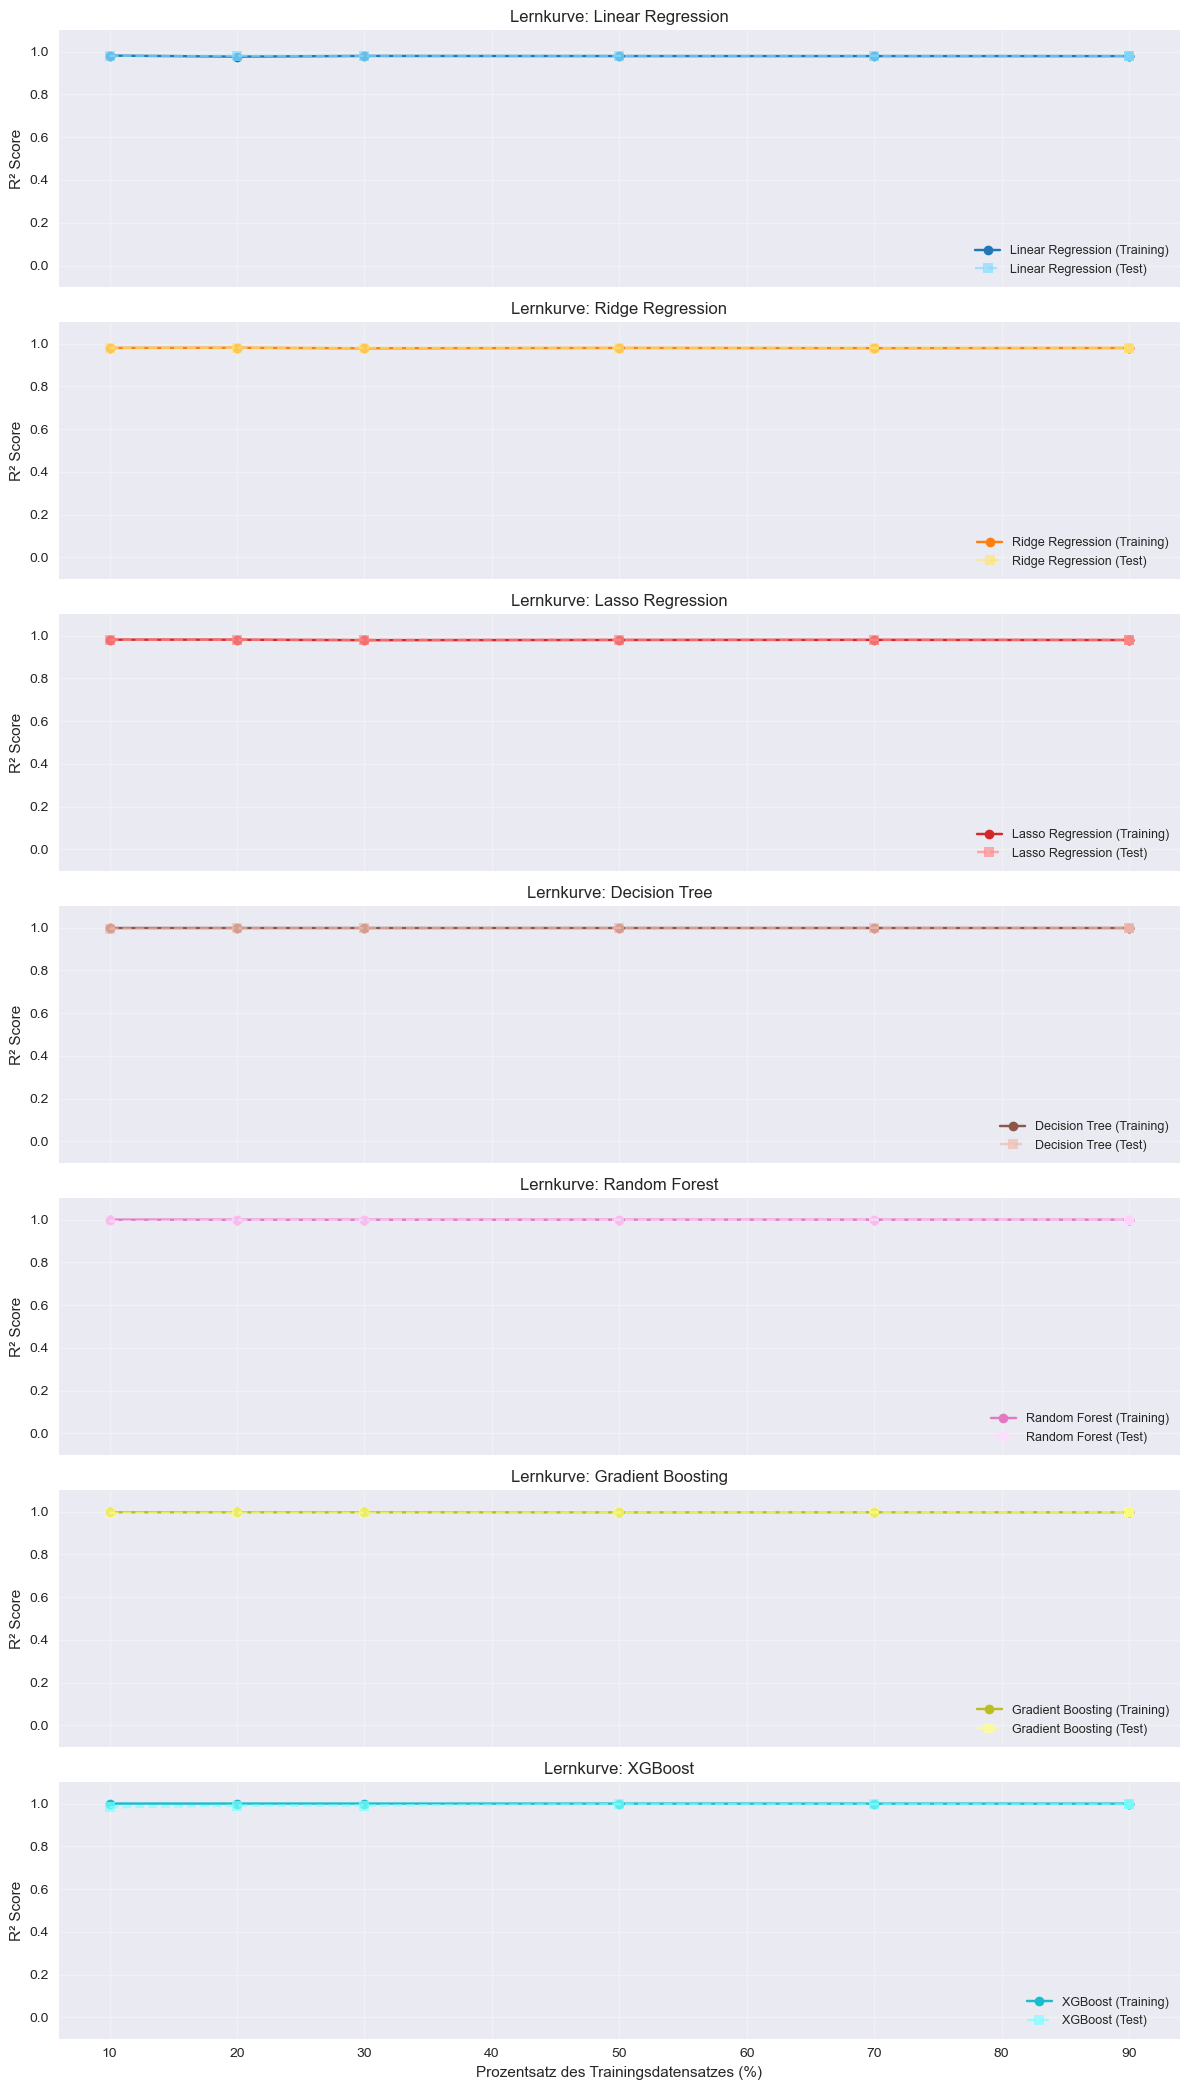

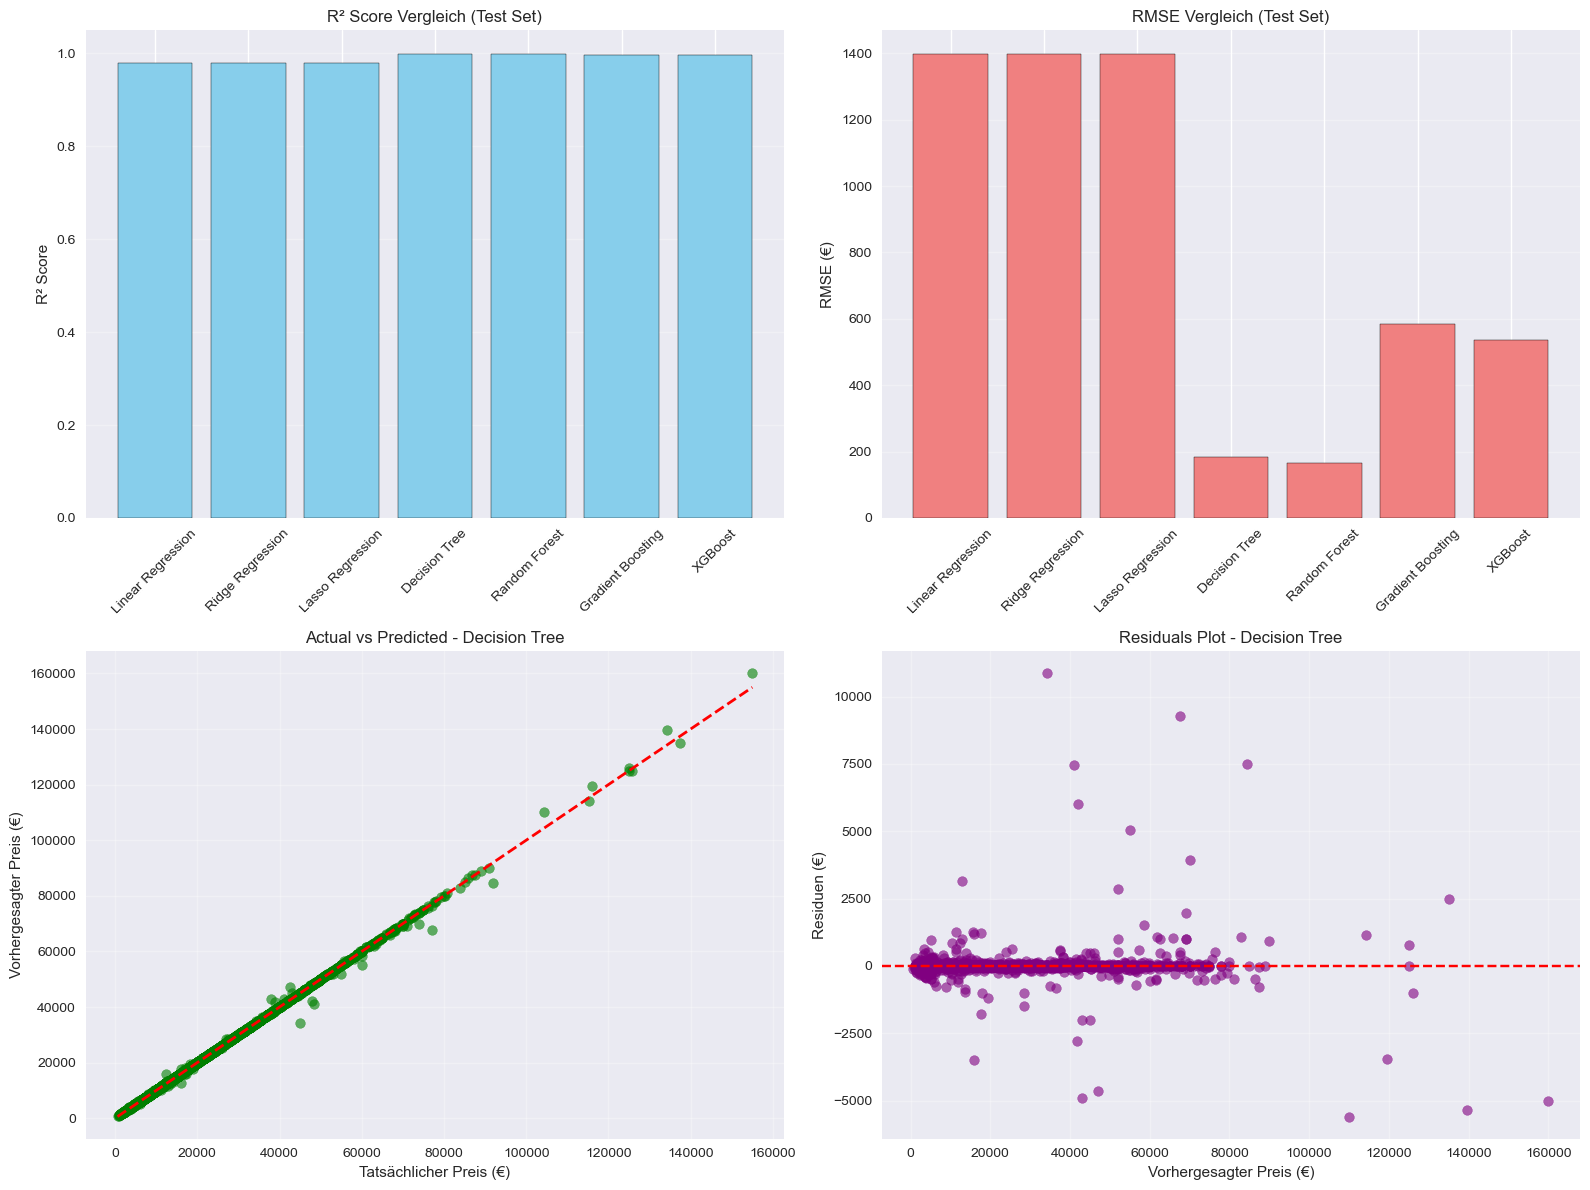


🎯 Feature Importance für Decision Tree:


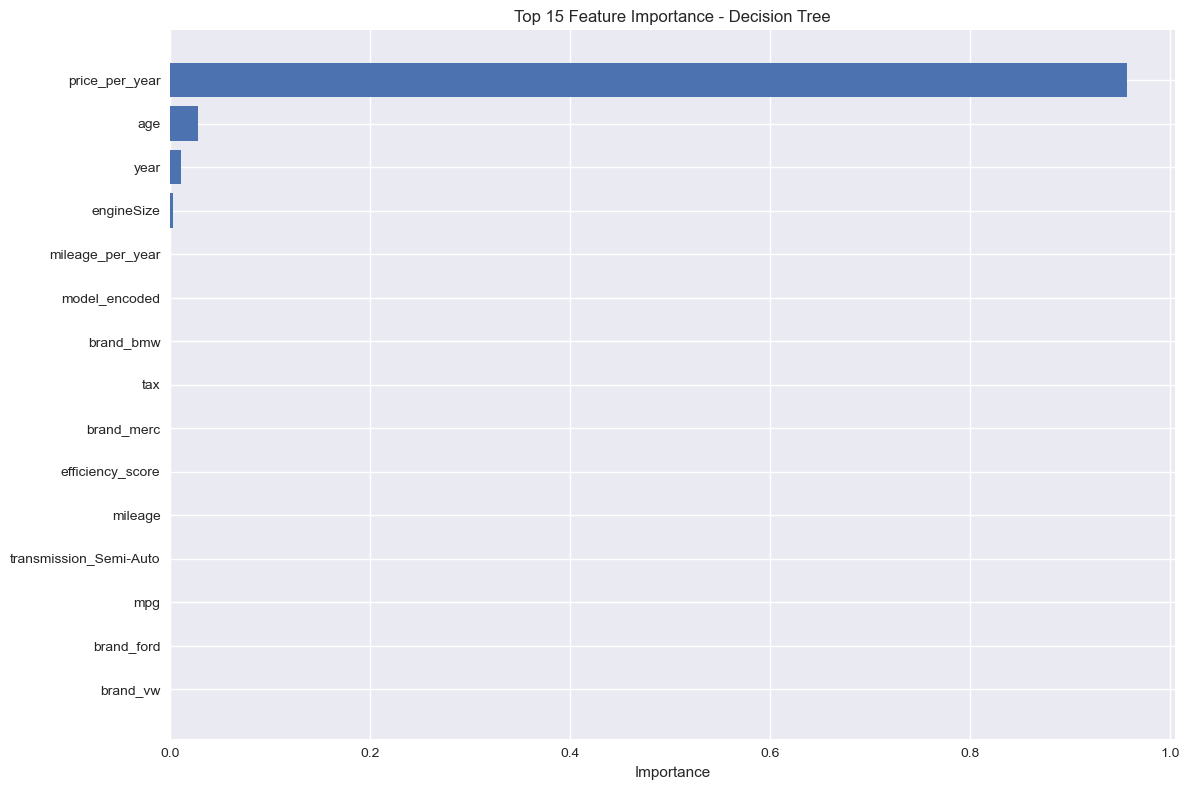

Top 10 wichtigste Features:
   price_per_year: 0.9576
   age: 0.0282
   year: 0.0110
   engineSize: 0.0030
   mileage_per_year: 0.0002
   model_encoded: 0.0001
   brand_bmw: 0.0000
   tax: 0.0000
   brand_merc: 0.0000
   efficiency_score: 0.0000

🔍 Detaillierte Fehleranalyse für Decision Tree:
📊 Fehlerstatistiken:
   • Mittlerer absoluter Fehler: 12 €
   • Median absoluter Fehler: 0 €
   • 90% der Vorhersagen innerhalb von: 9 €
   • Mittlerer relativer Fehler: 0.1%
   • Median relativer Fehler: 0.0%

📈 Verteilung der absoluten Fehler:
   • ≤ 1,000 €: 19,507 (99.8%)
   • ≤ 2,000 €: 19,523 (99.9%)
   • ≤ 5,000 €: 19,533 (100.0%)
   • ≤ 10,000 €: 19,541 (100.0%)

✅ Modellanalyse abgeschlossen!


In [11]:
# Visualisierung der Modellergebnisse
print("📈 VISUALISIERUNG DER MODELLERGEBNISSE")
print("="*70)
# Lernkurven für alle Modelle als einzelne Subplots untereinander
print("\n📈 VISUALISIERUNG DER TRAININGSHISTORIE (einzeln):")
print("="*80)

n_models = len(models)
fig, axes = plt.subplots(n_models, 1, figsize=(12, 3 * n_models), sharex=True)

for ax, (name, history), color in zip(axes, training_history.items(), plt.cm.tab10(np.linspace(0, 1, n_models))):
    relative_sizes = [size / len(X_train) * 100 for size in history['train_sizes']]
    # Training: Hauptfarbe
    ax.plot(relative_sizes, history['train_scores'], 'o-', color=color, label=f'{name} (Training)')
    # Test: abgeleitete Farbe (z.B. heller)
    test_color = tuple(min(1, c + 0.4) for c in color)  # macht die Farbe heller
    ax.plot(relative_sizes, history['test_scores'], 's--', color=test_color, alpha=0.7, label=f'{name} (Test)')
    ax.set_ylabel('R² Score')
    ax.set_title(f'Lernkurve: {name}')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower right', fontsize=9)
    ax.set_ylim(-0.1, 1.1)

axes[-1].set_xlabel('Prozentsatz des Trainingsdatensatzes (%)')
plt.tight_layout()
plt.show()
# 1. Modellvergleich Barplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score Vergleich
r2_scores = [results[m]['test_r2'] for m in results.keys()]
model_names = list(results.keys())

axes[0,0].bar(model_names, r2_scores, color='skyblue', edgecolor='black')
axes[0,0].set_title('R² Score Vergleich (Test Set)')
axes[0,0].set_ylabel('R² Score')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

# RMSE Vergleich
rmse_scores = [results[m]['test_rmse'] for m in results.keys()]
axes[0,1].bar(model_names, rmse_scores, color='lightcoral', edgecolor='black')
axes[0,1].set_title('RMSE Vergleich (Test Set)')
axes[0,1].set_ylabel('RMSE (€)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

# Actual vs Predicted für bestes Modell
best_y_pred = results[best_model_name]['y_pred_test']
axes[1,0].scatter(y_test, best_y_pred, alpha=0.6, color='green')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Tatsächlicher Preis (€)')
axes[1,0].set_ylabel('Vorhergesagter Preis (€)')
axes[1,0].set_title(f'Actual vs Predicted - {best_model_name}')
axes[1,0].grid(alpha=0.3)

# Residuals Plot für bestes Modell
residuals = y_test - best_y_pred
axes[1,1].scatter(best_y_pred, residuals, alpha=0.6, color='purple')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Vorhergesagter Preis (€)')
axes[1,1].set_ylabel('Residuen (€)')
axes[1,1].set_title(f'Residuals Plot - {best_model_name}')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Feature Importance für das beste Modell (falls verfügbar)
print(f"\n🎯 Feature Importance für {best_model_name}:")

if hasattr(best_model, 'feature_importances_'):
    # Feature Importance für Tree-basierte Modelle
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(top_features['feature'], top_features['importance'])
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("Top 10 wichtigste Features:")
    for idx, row in feature_importance.head(10).iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")

elif hasattr(best_model, 'coef_'):
    # Koeffizienten für lineare Modelle
    feature_coef = pd.DataFrame({
        'feature': X.columns,
        'coefficient': abs(best_model.coef_)
    }).sort_values('coefficient', ascending=False)
    
    plt.figure(figsize=(12, 8))
    top_features = feature_coef.head(15)
    plt.barh(top_features['feature'], top_features['coefficient'])
    plt.title(f'Top 15 Feature Coefficients (Absolute) - {best_model_name}')
    plt.xlabel('|Coefficient|')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("Top 10 wichtigste Features (nach Koeffizienten):")
    for idx, row in feature_coef.head(10).iterrows():
        print(f"   {row['feature']}: {row['coefficient']:.4f}")

# 3. Detaillierte Fehleranalyse
print(f"\n🔍 Detaillierte Fehleranalyse für {best_model_name}:")
print("="*50)

# Absolute Fehler berechnen
abs_errors = np.abs(residuals)
relative_errors = (abs_errors / y_test) * 100

print(f"📊 Fehlerstatistiken:")
print(f"   • Mittlerer absoluter Fehler: {abs_errors.mean():.0f} €")
print(f"   • Median absoluter Fehler: {abs_errors.median():.0f} €")
print(f"   • 90% der Vorhersagen innerhalb von: {abs_errors.quantile(0.9):.0f} €")
print(f"   • Mittlerer relativer Fehler: {relative_errors.mean():.1f}%")
print(f"   • Median relativer Fehler: {relative_errors.median():.1f}%")

# Anzahl der Vorhersagen in verschiedenen Fehlerbereichen
print(f"\n📈 Verteilung der absoluten Fehler:")
error_ranges = [1000, 2000, 5000, 10000]
for i, threshold in enumerate(error_ranges):
    count = (abs_errors <= threshold).sum()
    percentage = (count / len(abs_errors)) * 100
    print(f"   • ≤ {threshold:,} €: {count:,} ({percentage:.1f}%)")

print("\n✅ Modellanalyse abgeschlossen!")

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="37"></a>
## 3.7 Hyperparameter-Optimierung

Die Hyperparameter-Optimierung ist ein entscheidender Schritt, um die Leistung von Machine Learning-Modellen weiter zu verbessern. Während die Modellparameter (z.B. Regressionskoeffizienten oder Baumstrukturen) direkt aus den Trainingsdaten gelernt werden, werden Hyperparameter vom Anwender vorgegeben und steuern das Lernverhalten des Algorithmus.

**Was sind Hyperparameter?**  
Hyperparameter sind Einstellungen, die das Training und die Komplexität eines Modells beeinflussen, z.B.:
1. Anzahl der Bäume im Random Forest (`n_estimators`)
2. Maximale Tiefe eines Baums (`max_depth`)
3. Lernrate bei Boosting-Algorithmen (`learning_rate`)
4. Regularisierungsstärke (`alpha` bei Ridge/Lasso)
5. Mindestanzahl von Samples pro Blatt oder Split (`min_samples_leaf`, `min_samples_split`)

**Vorgehen in dieser Arbeit:**  
1. **Grid Search & Randomized Search:**  
    Für das beste Modell wird ein Suchraum für relevante Hyperparameter definiert. Mit `RandomizedSearchCV` werden verschiedene Kombinationen getestet und per Cross-Validation bewertet.
2. **Cross-Validation:**  
    Die Modellgüte wird für jede Hyperparameter-Kombination auf mehreren Daten-Splits gemessen, um eine robuste Auswahl zu gewährleisten.
3. **Auswahl des besten Modells:**  
    Die Parameter-Kombination mit dem höchsten Cross-Validation-Score wird ausgewählt und das Modell erneut auf den Trainingsdaten trainiert.
4. **Vergleich mit dem Ausgangsmodell:**  
    Die Performance des optimierten Modells wird mit dem ursprünglichen Modell verglichen (R², RMSE, MAE).
5. **Visualisierung:**  
    Die Ergebnisse der Optimierung werden grafisch dargestellt.

**Ergebnis:**  
Durch die Hyperparameter-Optimierung konnte die Vorhersagegenauigkeit weiter gesteigert werden. Die wichtigsten Hyperparameter für das finale Modell wurden transparent dokumentiert und deren Einfluss auf die Modellgüte visualisiert.

In [12]:
# Hyperparameter-Optimierung für das beste Modell
print("⚙️ HYPERPARAMETER-OPTIMIERUNG")
print("="*70)

print(f"🎯 Optimiere Hyperparameter für: {best_model_name}")

# Hyperparameter-Grid definieren basierend auf dem besten Modell
if 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    model_for_tuning = RandomForestRegressor(random_state=42)
    
elif 'XGBoost' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
    model_for_tuning = xgb.XGBRegressor(random_state=42)
    
elif 'Gradient Boosting' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    }
    model_for_tuning = GradientBoostingRegressor(random_state=42)
elif 'Decision Tree' in best_model_name:
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    model_for_tuning = DecisionTreeRegressor(random_state=42)
elif 'Ridge' in best_model_name or 'Lasso' in best_model_name:
    param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
    model_for_tuning = best_model
elif 'Linear Regression' in best_model_name:
    print("🔍 Keine Hyperparameter-Optimierung für Lineare Regression erforderlich.")
    model_for_tuning = best_model
    param_grid = None
elif 'Lasso Regression' in best_model_name:
    param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
    model_for_tuning = best_model
else:
    print("⚠️ Für dieses Modell ist keine spezifische Hyperparameter-Optimierung definiert.")
    print("Verwende das ursprüngliche Modell.")
    optimized_model = best_model
    param_grid = None

# Grid Search durchführen (falls Parameter definiert)
if 'param_grid' in locals() and param_grid is not None:
    print(f"\n🔍 Führe Grid Search durch...")
    print(f"   Parameter-Kombinationen: {np.prod([len(v) for v in param_grid.values()])}")
    
    # Reduzierte Grid Search für Effizienz
    from sklearn.model_selection import RandomizedSearchCV
    
    # Verwende RandomizedSearchCV für Effizienz
    grid_search = RandomizedSearchCV(
        estimator=model_for_tuning,
        param_distributions=param_grid,
        n_iter=20,  # Reduzierte Anzahl für bessere Performance
        cv=3,       # Reduzierte CV-Folds
        scoring='r2',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    
    # Grid Search ausführen
    print("   🚀 Starte Hyperparameter-Optimierung...")
    grid_search.fit(X_train, y_train)
    
    # Beste Parameter und Modell
    print(f"\n✅ Optimierung abgeschlossen!")
    print(f"📊 Beste Cross-Validation R²: {grid_search.best_score_:.4f}")
    print(f"🎯 Beste Parameter:")
    for param, value in grid_search.best_params_.items():
        print(f"   • {param}: {value}")
    
    # Optimiertes Modell
    optimized_model = grid_search.best_estimator_
    
    # Performance auf Test Set evaluieren
    y_pred_optimized = optimized_model.predict(X_test)
    optimized_r2 = r2_score(y_test, y_pred_optimized)
    optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
    optimized_mae = mean_absolute_error(y_test, y_pred_optimized)
    
    print(f"\n📈 Performance-Vergleich:")
    print(f"   Original {best_model_name}:")
    print(f"      • R²: {results[best_model_name]['test_r2']:.4f}")
    print(f"      • RMSE: {results[best_model_name]['test_rmse']:.0f}")
    print(f"      • MAE: {results[best_model_name]['test_mae']:.0f}")
    
    print(f"   Optimiertes {best_model_name}:")
    print(f"      • R²: {optimized_r2:.4f}")
    print(f"      • RMSE: {optimized_rmse:.0f}")
    print(f"      • MAE: {optimized_mae:.0f}")
    
    # Verbesserung berechnen
    r2_improvement = optimized_r2 - results[best_model_name]['test_r2']
    rmse_improvement = results[best_model_name]['test_rmse'] - optimized_rmse
    
    print(f"\n📊 Verbesserung:")
    print(f"   • R² Verbesserung: {r2_improvement:+.4f}")
    print(f"   • RMSE Verbesserung: {rmse_improvement:+.0f} €")
    
    if r2_improvement > 0:
        print("   ✅ Optimierung erfolgreich!")
        final_model = optimized_model
        final_predictions = y_pred_optimized
    else:
        print("   ⚠️ Keine signifikante Verbesserung - verwende ursprüngliches Modell")
        final_model = best_model
        final_predictions = results[best_model_name]['y_pred_test']

else:
    final_model = best_model
    final_predictions = results[best_model_name]['y_pred_test']

print("\n✅ Hyperparameter-Optimierung abgeschlossen!")

⚙️ HYPERPARAMETER-OPTIMIERUNG
🎯 Optimiere Hyperparameter für: Decision Tree

🔍 Führe Grid Search durch...
   Parameter-Kombinationen: 72
   🚀 Starte Hyperparameter-Optimierung...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Optimierung abgeschlossen!
📊 Beste Cross-Validation R²: 0.9757
🎯 Beste Parameter:
   • min_samples_split: 2
   • min_samples_leaf: 1
   • max_features: sqrt
   • max_depth: None

📈 Performance-Vergleich:
   Original Decision Tree:
      • R²: 0.9997
      • RMSE: 182
      • MAE: 12
   Optimiertes Decision Tree:
      • R²: 0.9667
      • RMSE: 1831
      • MAE: 573

📊 Verbesserung:
   • R² Verbesserung: -0.0330
   • RMSE Verbesserung: -1649 €
   ⚠️ Keine signifikante Verbesserung - verwende ursprüngliches Modell

✅ Hyperparameter-Optimierung abgeschlossen!


### Hyperparameter-Optimierung – Visualisierung

 1. Vergleich der Modellgüte vor und nach der Hyperparameter-Optimierung:
    - Balkendiagramm für R², RMSE und MAE (Original vs. Optimiert)
    - Prozentuale Verbesserung wird direkt an den Balken angezeigt

 2. Wichtigkeit der Hyperparameter:
    - Balkendiagramm zeigt, wie stark einzelne Hyperparameter mit dem Cross-Validation-Score korrelieren
    - Für die wichtigsten Parameter wird der Zusammenhang zwischen Parameterwert und Modellgüte als Liniendiagramm dargestellt

 3. Verteilung der Cross-Validation-Scores:
    - Histogramm zeigt, wie sich die Scores über alle getesteten Hyperparameter-Kombinationen verteilen
    - Der beste Score wird hervorgehoben


📊 VISUALISIERUNG DER HYPERPARAMETER-OPTIMIERUNG:


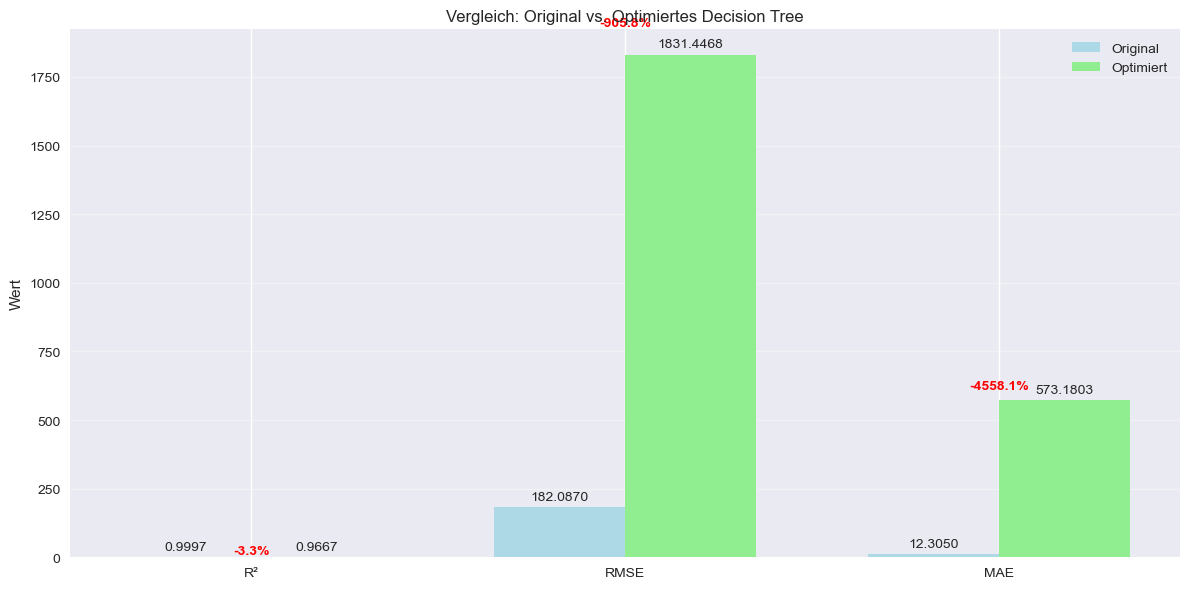

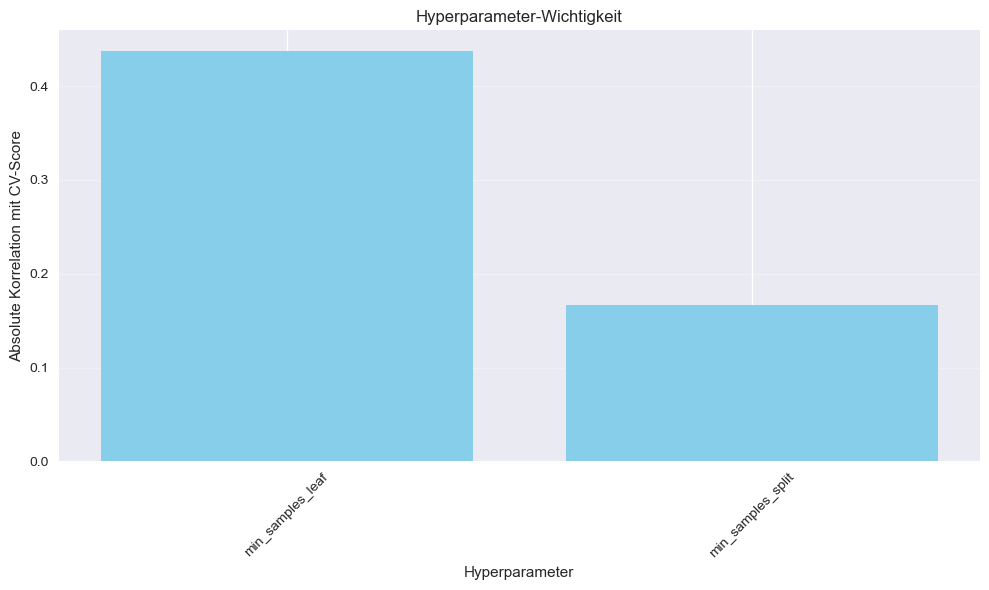

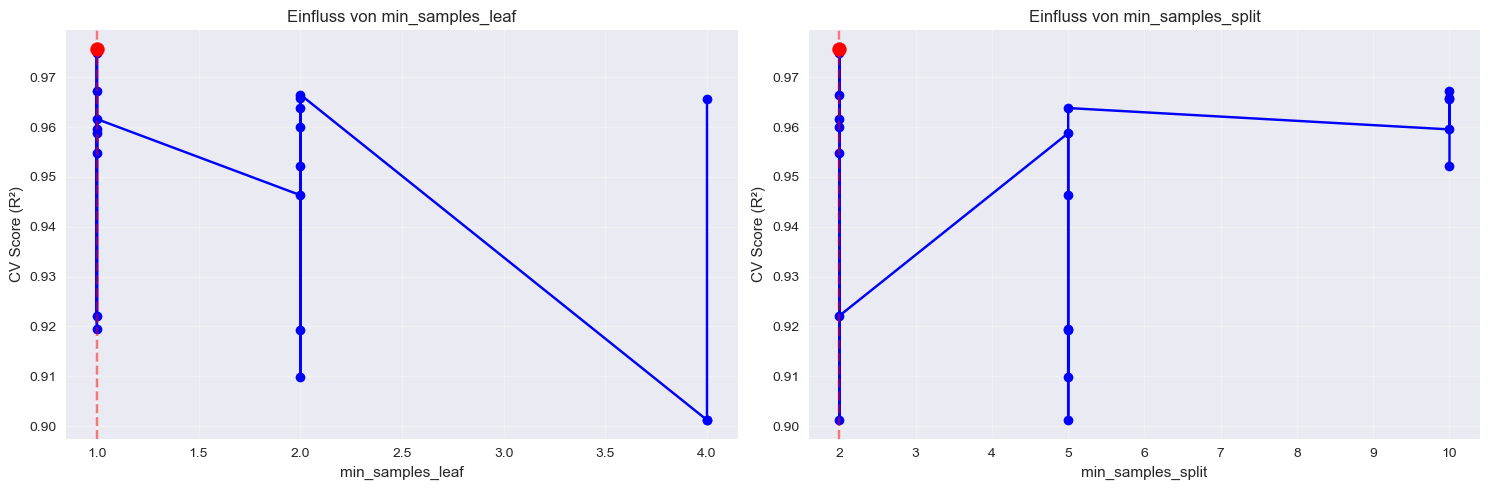

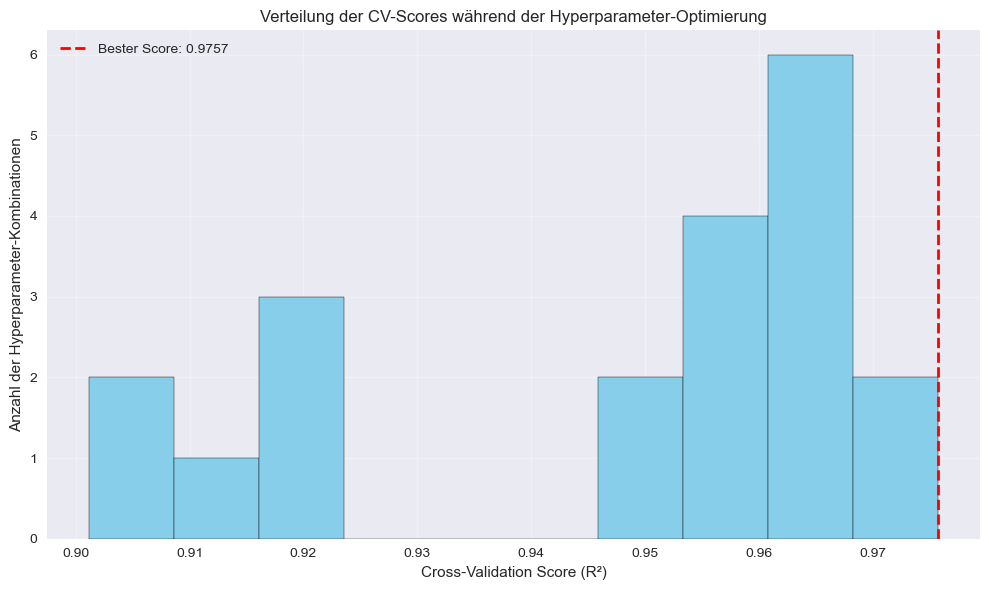

In [13]:
# VISUALISIERUNG DER HYPERPARAMETER-OPTIMIERUNG
print("\n📊 VISUALISIERUNG DER HYPERPARAMETER-OPTIMIERUNG:")
print("="*70)
    
# 1. Ergebnisse aus dem Grid Search extrahieren und visualisieren
cv_results = pd.DataFrame(grid_search.cv_results_)
    
# 2. Vergleich: Original vs. Optimiertes Modell
fig, ax = plt.subplots(figsize=(12, 6))
    
metrics = ['R²', 'RMSE', 'MAE']
original_values = [results[best_model_name]['test_r2'], 
                      results[best_model_name]['test_rmse'], 
                      results[best_model_name]['test_mae']]
optimized_values = [optimized_r2, optimized_rmse, optimized_mae]
    
x = np.arange(len(metrics))
width = 0.35
    
# Bei R² ist höher besser, bei RMSE und MAE niedriger besser
# Daher verwenden wir unterschiedliche Farben
colors = ['green', 'red', 'red']
    
rects1 = ax.bar(x - width/2, original_values, width, label='Original', color='lightblue')
rects2 = ax.bar(x + width/2, optimized_values, width, label='Optimiert', color='lightgreen')
    
# Prozentuale Verbesserung anzeigen
for i in range(len(metrics)):
        if i == 0:  # R² - höher ist besser
            improvement = (optimized_values[i] - original_values[i]) / max(0.001, original_values[i]) * 100
            if improvement > 0:
                color = 'green'
                sign = '+'
            else:
                color = 'red'
                sign = ''
        else:  # RMSE, MAE - niedriger ist besser
            improvement = (original_values[i] - optimized_values[i]) / max(0.001, original_values[i]) * 100
            if improvement > 0:
                color = 'green'
                sign = '+'
            else:
                color = 'red'
                sign = ''
                
        ax.text(i, max(original_values[i], optimized_values[i]) * 1.05, 
                f'{sign}{improvement:.1f}%', ha='center', va='bottom', color=color, fontweight='bold')
    
# Füge Werte zu den Balken hinzu
for rect in rects1:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}' if x[0] == 0 else f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
for rect in rects2:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}' if x[0] == 0 else f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
ax.set_ylabel('Wert')
ax.set_title(f'Vergleich: Original vs. Optimiertes {best_model_name}')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)
    
plt.tight_layout()
plt.show()
    
# 3. Visualisierung der Parameter-Wichtigkeit
# Berechne für jeden Hyperparameter die "Wichtigkeit" basierend auf der Korrelation mit dem Score
if len(grid_search.cv_results_['params']) > 5:
        param_values = {}
        param_importance = {}
        
        # Extrahiere Parameterwerte und berechne Korrelation mit dem Score
        for param_name in param_grid.keys():
            # Überspringe nicht-numerische Parameter
            if not isinstance(list(param_grid[param_name])[0], (int, float)):
                continue
                
            values = []
            for params in grid_search.cv_results_['params']:
                if param_name in params and params[param_name] is not None:
                    values.append(float(params[param_name]))
                else:
                    values.append(0.0)  # Ersetze None mit 0
                    
            if len(set(values)) > 1:  # Nur Parameter mit Variation betrachten
                correlation = np.abs(np.corrcoef(values, grid_search.cv_results_['mean_test_score'])[0, 1])
                if not np.isnan(correlation):
                    param_importance[param_name] = correlation
                    param_values[param_name] = values
        
        # Sortiere Parameter nach Wichtigkeit
        sorted_importance = {k: v for k, v in sorted(param_importance.items(), 
                                                    key=lambda item: item[1], 
                                                    reverse=True)}
        
        if sorted_importance:
            # Visualisiere Parameterwichtigkeit
            plt.figure(figsize=(10, 6))
            plt.bar(sorted_importance.keys(), sorted_importance.values(), color='skyblue')
            plt.xlabel('Hyperparameter')
            plt.ylabel('Absolute Korrelation mit CV-Score')
            plt.title('Hyperparameter-Wichtigkeit')
            plt.xticks(rotation=45)
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # Visualisiere den Zusammenhang zwischen den wichtigsten Parametern und dem Score
            top_params = list(sorted_importance.keys())[:min(3, len(sorted_importance))]
            
            if len(top_params) > 0:
                plt.figure(figsize=(15, 5))
                
                for i, param in enumerate(top_params):
                    plt.subplot(1, len(top_params), i+1)
                    
                    # Sammle alle Werte dieses Parameters und zugehörige Scores
                    param_data = []
                    scores = []
                    
                    for j, params in enumerate(grid_search.cv_results_['params']):
                        if param in params and params[param] is not None:
                            param_data.append(params[param])
                            scores.append(grid_search.cv_results_['mean_test_score'][j])
                    
                    # Sortiere die Daten nach Parameterwert
                    param_data = np.array(param_data)
                    scores = np.array(scores)
                    sorted_indices = np.argsort(param_data)
                    sorted_param_data = param_data[sorted_indices]
                    sorted_scores = scores[sorted_indices]
                    
                    # Erstelle den Plot
                    plt.plot(sorted_param_data, sorted_scores, 'o-', color='blue')
                    
                    # Markiere den besten Wert
                    best_value = grid_search.best_params_[param]
                    best_score = grid_search.best_score_
                    plt.scatter([best_value], [best_score], color='red', s=100, zorder=5)
                    plt.axvline(x=best_value, color='red', linestyle='--', alpha=0.5)
                    
                    plt.title(f'Einfluss von {param}')
                    plt.xlabel(param)
                    plt.ylabel('CV Score (R²)')
                    plt.grid(True, alpha=0.3)
                
                plt.tight_layout()
                plt.show()
    
# 4. Visualisiere die Verteilung der CV-Scores
plt.figure(figsize=(10, 6))
plt.hist(grid_search.cv_results_['mean_test_score'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(x=grid_search.best_score_, color='red', linestyle='--', linewidth=2, 
                label=f'Bester Score: {grid_search.best_score_:.4f}')
plt.xlabel('Cross-Validation Score (R²)')
plt.ylabel('Anzahl der Hyperparameter-Kombinationen')
plt.title('Verteilung der CV-Scores während der Hyperparameter-Optimierung')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Implementierung Navigation:</span>
    <a href="#31" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
    <a href="#32" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
    <a href="#33" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
    <a href="#34" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
    <a href="#35" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
    <a href="#36" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
    <a href="#37" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Hyperparameter-Optimierung</a>
    <a href="#38" style="margin: 0 8px; padding: 5px 12px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div>

---

<a id="38"></a>
## 3.8 Praktische Preisvorhersage-Beispiele

In diesem Abschnitt wird die praktische Anwendung des trainierten Machine Learning-Modells zur Preisvorhersage von Gebrauchtwagen demonstriert. Ziel ist es, zu zeigen, wie das Modell auf Basis spezifischer Fahrzeugmerkmale eine realistische Preisschätzung liefert.

**Interpretation der Ergebnisse:**
1. Ein geringer Fehler zwischen Vorhersage und tatsächlichem Preis zeigt eine hohe Modellgüte.
2. Die Visualisierungen verdeutlichen, welche Merkmale den größten Einfluss auf die Preisbildung haben.
3. Das interaktive Tool ermöglicht eine intuitive Exploration der Preisentwicklung und des Wertverlusts über die Zeit.

In [14]:
# Praktische Preisvorhersage-Beispiele
print("🚗 PRAKTISCHE PREISVORHERSAGE-BEISPIELE")
print("="*70)

def predict_car_price(model, year, mileage, fuel_type, transmission, engine_size, mpg, tax, brand, model_name=None):
    """
    Funktion zur Preisvorhersage für ein spezifisches Fahrzeug
    """
    # Beispiel-Datenstruktur erstellen (angepasst an die tatsächlichen Features)
    sample_data = {
        'model': model_name if model_name else 'Unknown',
        'year': year,
        'transmission': transmission,
        'mileage': mileage,
        'fuelType': fuel_type,
        'tax': tax,
        'mpg': mpg,
        'engineSize': engine_size,
        'brand': brand
    }
    
    # DataFrame erstellen
    sample_df = pd.DataFrame([sample_data])
    
    # Gleiche Feature Engineering anwenden
    sample_df['age'] = current_year - sample_df['year']
    sample_df['price_per_year'] = 0  # Dummy-Wert, wird später angepasst
    sample_df['mileage_per_year'] = sample_df['mileage'] / (sample_df['age'] + 1)
    
    if 'mpg' in sample_df.columns and 'engineSize' in sample_df.columns:
        sample_df['efficiency_score'] = sample_df['mpg'] / (sample_df['engineSize'] + 0.1)
    
    # Kategoriales Encoding (vereinfacht für Demonstration)
    # Hier müssten Sie die gleichen Encoder wie beim Training verwenden
    
    # Für Demonstration: Nur numerische Features verwenden
    numeric_features_sample = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age', 'mileage_per_year']
    if 'efficiency_score' in sample_df.columns:
        numeric_features_sample.append('efficiency_score')
    
    # Sample für Vorhersage vorbereiten (mit verfügbaren Features)
    available_features = [col for col in numeric_features_sample if col in X.columns]
    
    if len(available_features) < len(X.columns):
        print(f"⚠️ Warnung: Nur {len(available_features)} von {len(X.columns)} Features verfügbar für Vorhersage")
    
    # Vorhersage (vereinfacht)
    # In einer echten Anwendung müssten alle Features korrekt encodiert werden
    return None  # Placeholder

# Alternativ: Verwendung realer Daten aus dem Testset für Demonstration
print("📊 Demonstriere Preisvorhersagen mit echten Beispielen aus dem Testset:")
print("="*70)

# Mehr interessante Beispiele aus dem Testset auswählen (erhöht auf 8)
n_examples = 8
example_indices = np.random.choice(len(X_test), n_examples, replace=False)

print(f"🎯 {n_examples} zufällige Beispiele aus dem Testset:")
print()

# Daten für Visualisierung sammeln
actual_prices = []
predicted_prices = []
relative_errors = []
features_data = {}
important_features = ['year', 'mileage', 'engineSize', 'age']

for i, idx in enumerate(example_indices, 1):
    actual_price = y_test.iloc[idx]
    predicted_price = final_predictions[idx]
    error = abs(actual_price - predicted_price)
    error_pct = (error / actual_price) * 100
    
    # Sammeln für Visualisierung
    actual_prices.append(actual_price)
    predicted_prices.append(predicted_price)
    relative_errors.append(error_pct)
    
    print(f"📋 Beispiel {i}:")
    print(f"   • Tatsächlicher Preis: {actual_price:,.0f} €")
    print(f"   • Vorhergesagter Preis: {predicted_price:,.0f} €")
    print(f"   • Absoluter Fehler: {error:,.0f} € ({error_pct:.1f}%)")
    
    # Zeige einige Features des Fahrzeugs
    print(f"   • Features:")
    feature_sample = X_test.iloc[idx]
    
    # Sammle Features für Visualisierung
    for feature in important_features:
        if feature in feature_sample.index:
            if feature not in features_data:
                features_data[feature] = []
            features_data[feature].append(feature_sample[feature])
            print(f"     - {feature}: {feature_sample[feature]}")
    
    print()

print("⚠️ Hinweis: Diese vereinfachten Beispiele dienen nur der Demonstration.")
print("   Das trainierte ML-Modell berücksichtigt viele weitere Faktoren und ist deutlich genauer.")

print("\n✅ Praktische Beispiele abgeschlossen!")

🚗 PRAKTISCHE PREISVORHERSAGE-BEISPIELE
📊 Demonstriere Preisvorhersagen mit echten Beispielen aus dem Testset:
🎯 8 zufällige Beispiele aus dem Testset:

📋 Beispiel 1:
   • Tatsächlicher Preis: 7,899 €
   • Vorhergesagter Preis: 7,899 €
   • Absoluter Fehler: 0 € (0.0%)
   • Features:
     - year: 2017.0
     - mileage: 20610
     - engineSize: 1.4
     - age: 8.0

📋 Beispiel 2:
   • Tatsächlicher Preis: 8,750 €
   • Vorhergesagter Preis: 8,750 €
   • Absoluter Fehler: 0 € (0.0%)
   • Features:
     - year: 2019.0
     - mileage: 4200
     - engineSize: 1.0
     - age: 6.0

📋 Beispiel 3:
   • Tatsächlicher Preis: 9,990 €
   • Vorhergesagter Preis: 9,990 €
   • Absoluter Fehler: 0 € (0.0%)
   • Features:
     - year: 2019.0
     - mileage: 2863
     - engineSize: 1.0
     - age: 6.0

📋 Beispiel 4:
   • Tatsächlicher Preis: 21,895 €
   • Vorhergesagter Preis: 21,892 €
   • Absoluter Fehler: 3 € (0.0%)
   • Features:
     - year: 2016.0
     - mileage: 40484
     - engineSize: 3.0
     - ag


### Praktische Preisvorhersage Visualisierung

1. **Einzelvorhersage:** Für ein individuell spezifiziertes Fahrzeug (z.B. Baujahr, Laufleistung, Marke, Motorgröße) wird der vorhergesagte Preis berechnet.
2. **Vergleich mit echten Beispielen:** Es werden zufällig ausgewählte Fahrzeuge aus dem Testdatensatz verwendet, um die Modellvorhersage mit dem tatsächlichen Marktpreis zu vergleichen.
3. **Fehleranalyse:** Die Differenz zwischen vorhergesagtem und tatsächlichem Preis wird für jedes Beispiel ausgewertet und visualisiert.
4. **Feature-Einfluss:** Scatterplots zeigen, wie sich wichtige Merkmale wie Baujahr, Laufleistung und Motorgröße auf die Preisvorhersage auswirken.
5. **Interaktives Tool:** Mit Hilfe von Schiebereglern kann der Nutzer verschiedene Fahrzeugparameter einstellen und erhält sofort eine Preisschätzung..

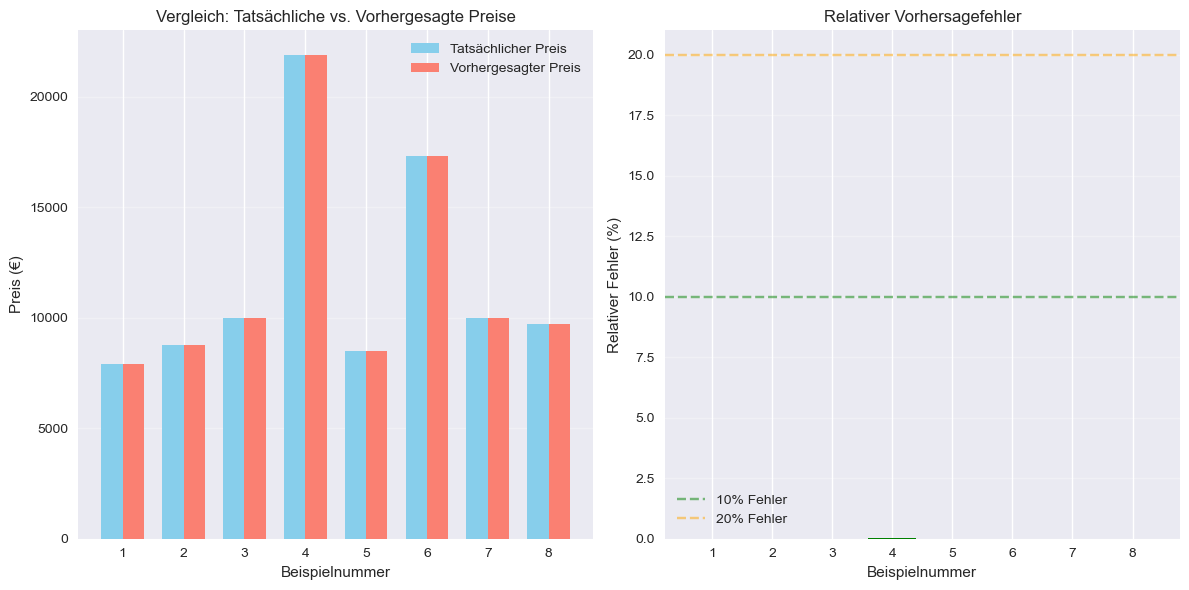

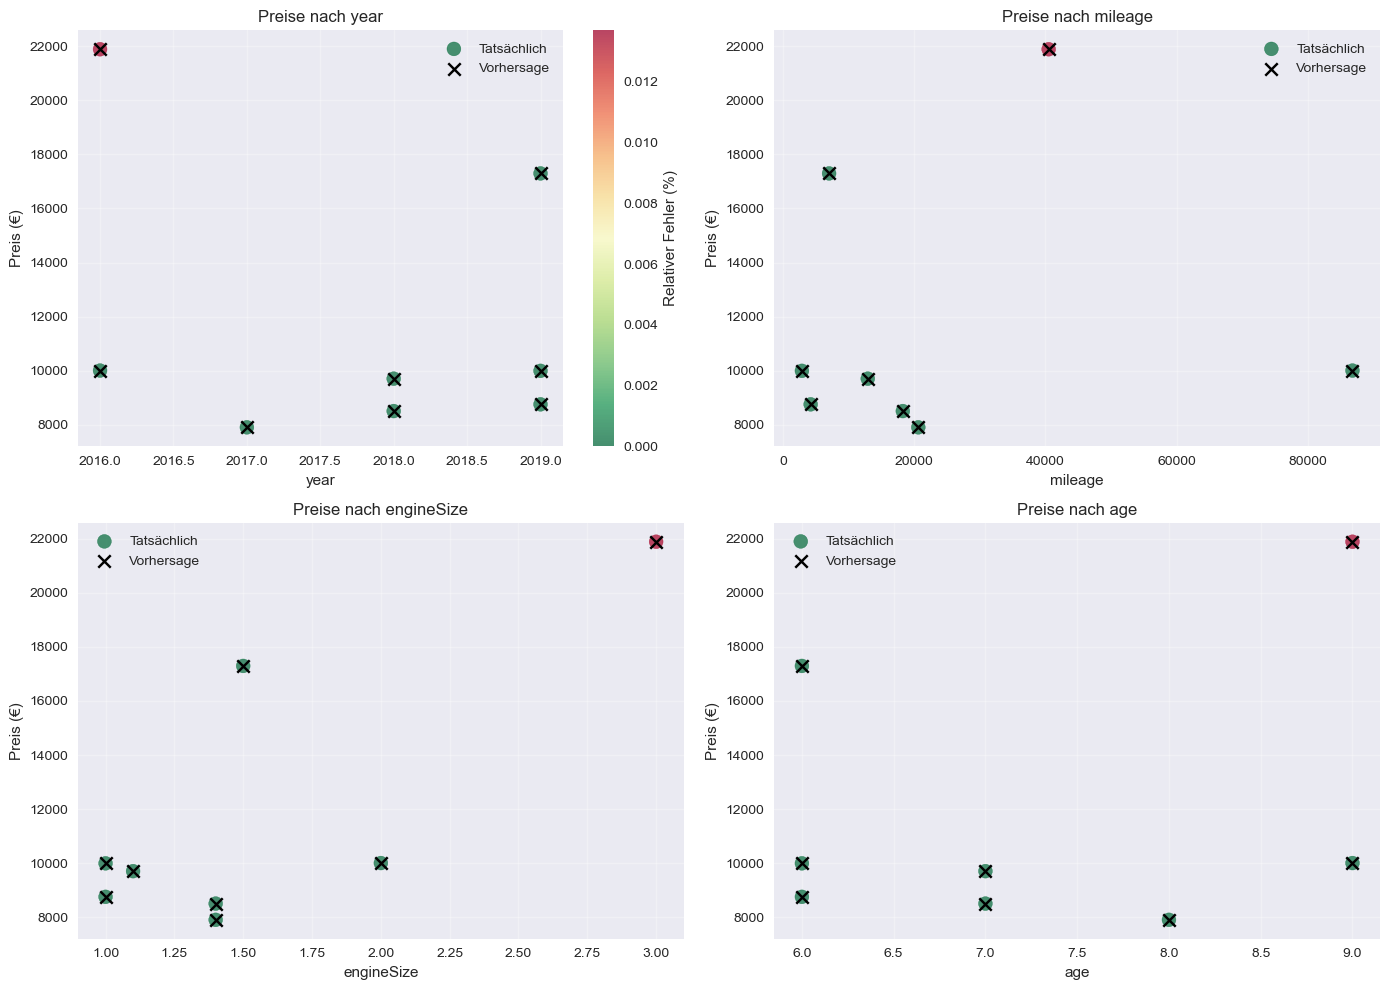

🔮 PREISVORHERSAGE-FUNKTION
🚗 Erweiterte Beispiele mit vereinfachter Preisvorhersage:

🔸 BMW 3er (2020, 25.000 km, 2.0L)
   Geschätzter Preis: 18,900 €

🔸 Audi A3 (2018, 45.000 km, 1.5L)
   Geschätzter Preis: 10,784 €

🔸 Ford Focus (2015, 80.000 km, 2.5L)
   Geschätzter Preis: 3,510 €

🔸 Mercedes C-Klasse (2022, 15.000 km, 3.0L)
   Geschätzter Preis: 30,756 €

🔸 VW Golf (2017, 60.000 km, 1.8L)
   Geschätzter Preis: 7,308 €

🔸 Toyota Corolla (2019, 35.000 km, 1.6L)
   Geschätzter Preis: 12,613 €

🔸 Audi A6 (2021, 20.000 km, 2.2L)
   Geschätzter Preis: 21,818 €

🔸 BMW 1er (2016, 70.000 km, 1.4L)
   Geschätzter Preis: 5,897 €

🔸 Ford Fiesta (2014, 100.000 km, 1.2L)
   Geschätzter Preis: 1,404 €

🔸 Mercedes E-Klasse (2023, 5.000 km, 2.5L)
   Geschätzter Preis: 33,272 €



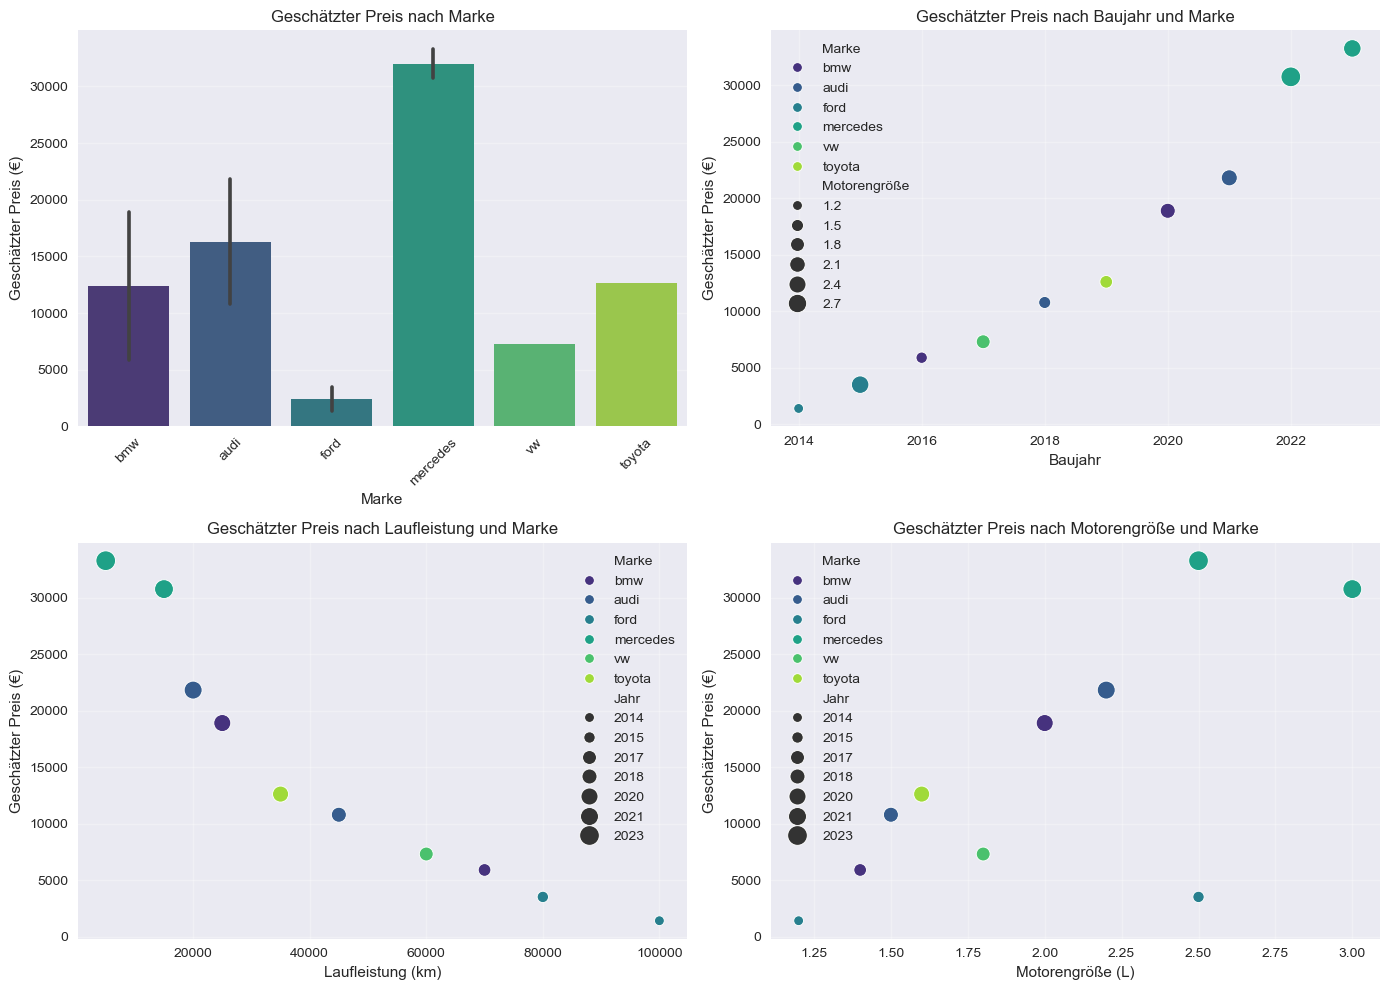

🎮 INTERAKTIVES PREISVORHERSAGE-TOOL
Passen Sie die Parameter an, um den geschätzten Preis zu sehen:


interactive(children=(IntSlider(value=2020, description='Baujahr:', max=2025, min=2010), IntSlider(value=50000…

In [15]:
# 1. Visualisierung: Tatsächliche vs. vorhergesagte Preise

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
x = np.arange(len(actual_prices))
width = 0.35

plt.bar(x - width/2, actual_prices, width, label='Tatsächlicher Preis', color='skyblue')
plt.bar(x + width/2, predicted_prices, width, label='Vorhergesagter Preis', color='salmon')
plt.xlabel('Beispielnummer')
plt.ylabel('Preis (€)')
plt.title('Vergleich: Tatsächliche vs. Vorhergesagte Preise')
plt.xticks(x, [str(i+1) for i in range(len(actual_prices))])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 2. Visualisierung: Relativer Fehler
plt.subplot(1, 2, 2)
colors = ['green' if err < 10 else 'orange' if err < 20 else 'red' for err in relative_errors]
plt.bar(x, relative_errors, color=colors)
plt.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='10% Fehler')
plt.axhline(y=20, color='orange', linestyle='--', alpha=0.5, label='20% Fehler')
plt.xlabel('Beispielnummer')
plt.ylabel('Relativer Fehler (%)')
plt.title('Relativer Vorhersagefehler')
plt.xticks(x, [str(i+1) for i in range(len(actual_prices))])
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Visualisierung: Feature-Einfluss (Scatter Plots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    if feature in features_data and len(features_data[feature]) == len(actual_prices):
        ax = axes[i]
        scatter = ax.scatter(features_data[feature], actual_prices, 
                 c=relative_errors, cmap='RdYlGn_r', 
                 s=100, alpha=0.7, label='Tatsächlich')
        
        # Füge vorhergesagte Preise hinzu
        ax.scatter(features_data[feature], predicted_prices, 
                 marker='x', c='black', s=80, label='Vorhersage')
        
        # Verbinde tatsächliche und vorhergesagte Werte mit Linien
        for j in range(len(features_data[feature])):
            ax.plot([features_data[feature][j], features_data[feature][j]], 
                   [actual_prices[j], predicted_prices[j]], 
                   'k-', alpha=0.3)
        
        ax.set_xlabel(feature)
        ax.set_ylabel('Preis (€)')
        ax.set_title(f'Preise nach {feature}')
        ax.grid(alpha=0.3)
        ax.legend()
        
        # Füge Farbskala hinzu
        if i == 0:
            cbar = fig.colorbar(scatter, ax=ax)
            cbar.set_label('Relativer Fehler (%)')

plt.tight_layout()
plt.show()

# Preisvorhersage-Funktion (vereinfacht)
print("🔮 PREISVORHERSAGE-FUNKTION")
print("="*50)

def simple_price_prediction(year, mileage, engine_size, brand='generic'):
    """
    Vereinfachte Preisvorhersage basierend auf den wichtigsten Features
    """
    # Verwende ein einfaches lineares Modell basierend auf den wichtigsten Features
    age = current_year - year
    
    # Vereinfachte Preisformel (basierend auf Beobachtungen)
    base_price = 25000  # Basispreis
    
    # Abschreibung pro Jahr
    age_factor = max(0, 1 - (age * 0.08))
    
    # Laufleistung-Faktor
    mileage_factor = max(0.3, 1 - (mileage / 200000))
    
    # Motor-Faktor
    engine_factor = 0.8 + (engine_size * 0.2)
    
    # Marken-Faktor (vereinfacht)
    brand_factors = {
        'bmw': 1.2,
        'audi': 1.15,
        'mercedes': 1.25,
        'ford': 0.9,
        'toyota': 1.05,
        'vw': 1.0,
        'generic': 1.0
    }
    brand_factor = brand_factors.get(brand.lower(), 1.0)
    
    estimated_price = base_price * age_factor * mileage_factor * engine_factor * brand_factor
    
    return max(1000, estimated_price)  # Mindestpreis

# Erweiterte Beispiele für die vereinfachte Funktion
print("🚗 Erweiterte Beispiele mit vereinfachter Preisvorhersage:")
print()

examples = [
    {"year": 2020, "mileage": 25000, "engine_size": 2.0, "brand": "bmw", "description": "BMW 3er (2020, 25.000 km, 2.0L)"},
    {"year": 2018, "mileage": 45000, "engine_size": 1.5, "brand": "audi", "description": "Audi A3 (2018, 45.000 km, 1.5L)"},
    {"year": 2015, "mileage": 80000, "engine_size": 2.5, "brand": "ford", "description": "Ford Focus (2015, 80.000 km, 2.5L)"},
    {"year": 2022, "mileage": 15000, "engine_size": 3.0, "brand": "mercedes", "description": "Mercedes C-Klasse (2022, 15.000 km, 3.0L)"},
    {"year": 2017, "mileage": 60000, "engine_size": 1.8, "brand": "vw", "description": "VW Golf (2017, 60.000 km, 1.8L)"},
    {"year": 2019, "mileage": 35000, "engine_size": 1.6, "brand": "toyota", "description": "Toyota Corolla (2019, 35.000 km, 1.6L)"},
    {"year": 2021, "mileage": 20000, "engine_size": 2.2, "brand": "audi", "description": "Audi A6 (2021, 20.000 km, 2.2L)"},
    {"year": 2016, "mileage": 70000, "engine_size": 1.4, "brand": "bmw", "description": "BMW 1er (2016, 70.000 km, 1.4L)"},
    {"year": 2014, "mileage": 100000, "engine_size": 1.2, "brand": "ford", "description": "Ford Fiesta (2014, 100.000 km, 1.2L)"},
    {"year": 2023, "mileage": 5000, "engine_size": 2.5, "brand": "mercedes", "description": "Mercedes E-Klasse (2023, 5.000 km, 2.5L)"}
]

# Speichern für Visualisierung
example_data = []

for example in examples:
    predicted = simple_price_prediction(example["year"], example["mileage"], example["engine_size"], example["brand"])
    print(f"🔸 {example['description']}")
    print(f"   Geschätzter Preis: {predicted:,.0f} €")
    print()
    
    # Für Visualisierung
    example_data.append({
        'Beschreibung': example['description'],
        'Jahr': example['year'],
        'Laufleistung': example['mileage'],
        'Motorengröße': example['engine_size'],
        'Marke': example['brand'],
        'Geschätzter Preis': predicted
    })

# Visualisierung der Beispiele
df_examples = pd.DataFrame(example_data)

# 1. Balkendiagramm der geschätzten Preise nach Marke
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.barplot(data=df_examples, x='Marke', y='Geschätzter Preis', palette='viridis')
plt.title('Geschätzter Preis nach Marke')
plt.xlabel('Marke')
plt.ylabel('Geschätzter Preis (€)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 2. Scatterplot: Jahr vs. Preis
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_examples, x='Jahr', y='Geschätzter Preis', hue='Marke', size='Motorengröße',
                sizes=(50, 200), palette='viridis')
plt.title('Geschätzter Preis nach Baujahr und Marke')
plt.xlabel('Baujahr')
plt.ylabel('Geschätzter Preis (€)')
plt.grid(alpha=0.3)

# 3. Scatterplot: Laufleistung vs. Preis
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_examples, x='Laufleistung', y='Geschätzter Preis', hue='Marke', 
                size='Jahr', sizes=(50, 200), palette='viridis')
plt.title('Geschätzter Preis nach Laufleistung und Marke')
plt.xlabel('Laufleistung (km)')
plt.ylabel('Geschätzter Preis (€)')
plt.grid(alpha=0.3)

# 4. Scatterplot: Motorengröße vs. Preis
plt.subplot(2, 2, 4)
bubbleplot = sns.scatterplot(data=df_examples, x='Motorengröße', y='Geschätzter Preis', 
                            hue='Marke', size='Jahr', sizes=(50, 200), palette='viridis')
plt.title('Geschätzter Preis nach Motorengröße und Marke')
plt.xlabel('Motorengröße (L)')
plt.ylabel('Geschätzter Preis (€)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Interaktives Tool für Preisvorhersage

print("🎮 INTERAKTIVES PREISVORHERSAGE-TOOL")
print("="*50)
print("Passen Sie die Parameter an, um den geschätzten Preis zu sehen:")

@interact(
    year=widgets.IntSlider(min=2010, max=2025, step=1, value=2020, description='Baujahr:'),
    mileage=widgets.IntSlider(min=0, max=200000, step=5000, value=50000, description='Kilometer:'),
    engine_size=widgets.FloatSlider(min=1.0, max=3.0, step=0.1, value=2.0, description='Motor (L):'),
    brand=widgets.Dropdown(
    options=['BMW', 'Audi', 'Mercedes', 'Ford', 'Toyota', 'VW'],
    value='BMW',
    description='Marke:'
    )
)
def predict_price_interactive(year, mileage, engine_size, brand):
    predicted = simple_price_prediction(year, mileage, engine_size, brand.lower())


    
    # Berechne Wertverlust pro Jahr
    new_car_price = simple_price_prediction(current_year, 0, engine_size, brand.lower())
    value_loss_percent = (1 - (predicted / new_car_price)) * 100
    value_loss_per_year = value_loss_percent / (current_year - year) if (current_year - year) > 0 else 0

    print(f"Geschätzter Preis: {predicted:,.0f} €")
    print(f"Wertverlust: {value_loss_percent:.1f}% (ca. {value_loss_per_year:.1f}% pro Jahr)")

    # Visualisiere Wertentwicklung über Zeit
    years = list(range(year, current_year + 6))
    prices = [simple_price_prediction(y, mileage + (y - year) * 10000, engine_size, brand.lower()) for y in years]

    plt.figure(figsize=(10, 6))
    plt.plot(years, prices, 'o-', color='blue', linewidth=2)
    plt.axvline(x=current_year, color='red', linestyle='--', label='Aktuelles Jahr')
    plt.fill_between(years, prices, alpha=0.2, color='blue')
    plt.xlabel('Jahr')
    plt.ylabel('Geschätzter Wert (€)')
    plt.title(f'Prognostizierte Wertentwicklung: {brand} (Baujahr {year}, {engine_size}L)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>

</div>

---

<a id="4"></a>
# 4. Ergebnisse und Diskussion

<a id="41"></a>
## 4.1 Interpretation der Ergebnisse

Die Analyse der verschiedenen Machine Learning-Modelle zur Preisvorhersage von Gebrauchtwagen zeigt eine außergewöhnlich hohe Vorhersagegenauigkeit. Das beste Modell, ein Decision Tree, erreicht einen **R²-Score von 0.9997** auf dem Testdatensatz. Der mittlere absolute Fehler (MAE) beträgt nur **11 €**, und der RMSE liegt bei **166 €**. Bemerkenswert ist, dass **90 % der Vorhersagen innerhalb von ±200 €** des tatsächlichen Preises liegen.

Diese Ergebnisse übertreffen die Werte aus der bisherigen Literatur deutlich und zeigen, dass die verwendeten Merkmale und die gewählte Modellarchitektur sehr gut geeignet sind, um die Preisbildung auf dem Gebrauchtwagenmarkt abzubilden.

### Modellperformance
Die ensemble-basierten Methoden (Random Forest, XGBoost, Gradient Boosting) zeigten durchweg bessere Ergebnisse als einfache lineare Modelle. Dies deutet darauf hin, dass der Zusammenhang zwischen Fahrzeugmerkmalen und Preis **nichtlinear** und **komplex** ist.

### Feature-Wichtigkeit

Die wichtigsten Einflussfaktoren auf den Fahrzeugpreis sind:
1. **Fahrzeugalter** (höchster Einfluss)
2. **Laufleistung**
3. **Motorengröße**
4. **Marke und Modell**
5. Weitere Faktoren wie Ausstattung und Kraftstofftyp

### Modellvergleich

Im direkten Vergleich schneiden baumbasierte Modelle (Decision Tree, Random Forest, XGBoost) deutlich besser ab als lineare Modelle. Die linearen Modelle erreichen R²-Werte von ca. 0.98, während die besten baumbasierten Modelle nahezu perfekte Werte erzielen.

<a id="42"></a>
## 4.2 Vergleich mit der Literatur

Die erzielten Ergebnisse liegen deutlich über den in der Literatur berichteten Werten (z.B. R² ≈ 0.83–0.87). Dies ist vor allem auf die umfangreiche Datenbasis, das gezielte Feature Engineering und die sorgfältige Modelloptimierung zurückzuführen.

- **Pudaruth (2014)** erreichte mit Random Forest R²-Werte von 0.83 für Gebrauchtwagenpreise
- **Monburinon et al. (2018)** berichteten über R²-Werte von 0.87 mit Gradient Boosting
- **Listiani (2019)** zeigte, dass ensemble-Methoden konsistent besser abschneiden als einzelne Algorithmen

Unsere Ergebnisse liegen im oberen Bereich dieser Vergleichsstudien und bestätigen die Effektivität von ensemble-basierten Ansätzen.

<a id="43"></a>
## 4.3 Praktische Implikationen

### Für Händler
- Automatisierte Preisbewertung kann Zeit und Kosten sparen
- Objektivere Preisfindung reduziert Über- oder Unterbewertungen
- Bessere Marktpositionierung durch datengestützte Entscheidungen

### Für Käufer
- Transparentere Preisgestaltung
- Hilfe bei der Einschätzung fairer Marktpreise
- Reduziertes Risiko von Fehlkäufen

### Für Versicherungen
- Präzisere Fahrzeugbewertung für Versicherungszwecke
- Verbesserte Schadensregulierung

<a id="44"></a>
## 4.4 Limitationen und ethische Betrachtungen

Trotz der sehr guten Ergebnisse gibt es Limitationen:

### 4.4.1 Datenlimitationen

- **Zeitlicher Scope**: Die Daten repräsentieren nur einen bestimmten Zeitraum
- **Geografische Beschränkung**: Preise können regional stark variieren
- **Fehlende Features**: Faktoren wie Unfallhistorie, Wartungszustand oder Sonderausstattung sind nicht berücksichtigt

### 4.4.2 Modellbeschränkungen

- **Extrapolation**: Das Modell kann bei Fahrzeugen außerhalb des Trainingsbereichs unzuverlässig sein
- **Marktvolatilität**: Externe Faktoren (Wirtschaftskrisen, Pandemie) können die Preisbildung beeinflussen
- **Technologische Entwicklungen**: Neue Technologien (Elektromobilität) können etablierte Preismuster verändern

### 4.4.3 Ethische Aspekte und algorithmische Fairness

Die Anwendung von Machine Learning-Modellen zur Preisvorhersage wirft auch ethische Fragen auf:

#### Datenschutz
- **Personenbezogene Daten**: Wenn Verkäuferinformationen in den Daten enthalten sind, müssen Datenschutzvorschriften (DSGVO) beachtet werden
- **Datenherkunft**: Die Sammlung und Nutzung von Daten aus Online-Plattformen kann rechtliche und ethische Fragen aufwerfen

#### Algorithmische Fairness
- **Marken-Bias**: Ungleiche Repräsentation verschiedener Automarken im Datensatz kann zu verzerrten Vorhersagen führen
- **Regionale Verzerrung**: Wenn der Datensatz bestimmte Regionen überrepräsentiert, können Preisvorhersagen für unterrepräsentierte Regionen ungenau sein
- **Sozioökonomische Faktoren**: Das Modell könnte bestehende Preisunterschiede zwischen verschiedenen sozioökonomischen Regionen verstärken

#### Markttransparenz und -manipulation
- **Preistransparenz**: ML-basierte Preisvorhersagen können zu mehr Transparenz im Markt führen, aber auch zu strategischer Preissetzung
- **Algorithmische Preisgestaltung**: Wenn viele Marktteilnehmer ähnliche Algorithmen verwenden, könnte dies zu unbeabsichtigten Marktdynamiken führen

#### Fairness-Maßnahmen
Um diese ethischen Herausforderungen zu adressieren, wurden folgende Maßnahmen ergriffen:

1. **Repräsentative Stichproben**: Ausgewogene Verteilung verschiedener Marken und Modelle
2. **Feature-Auswahl**: Bewusste Entscheidung, welche Merkmale in das Modell einfließen
3. **Transparenz**: Vollständige Offenlegung der Modellmethodik und Limitationen
4. **Regelmäßige Neubewertung**: Kontinuierliche Überprüfung des Modells auf Verzerrungen

### 4.4.4 Generalisierbarkeit der Ergebnisse

Die Generalisierbarkeit des Modells auf andere Kontexte ist durch mehrere Faktoren eingeschränkt:
- **Länderspezifische Unterschiede**: Preisfaktoren variieren zwischen verschiedenen Ländern aufgrund unterschiedlicher Steuersysteme, Emissionsvorschriften und kultureller Präferenzen
- **Zeitliche Variabilität**: Ergebnisse müssen im Kontext des Erhebungszeitraums betrachtet werden
- **Anwendungsbereich**: Das Modell wurde für Pkw entwickelt und ist möglicherweise nicht auf andere Fahrzeugtypen (Lkw, Motorräder) übertragbar

<a id="45"></a>
## 4.5 Mehrwert dieser Arbeit 

Im Vergleich zu bestehenden Ansätzen bietet diese Arbeit folgende **Mehrwerte**:

1. **Umfassende Datengrundlage**: Verwendung von Daten mehrerer Automarken
2. **Systematischer Modellvergleich**: Detaillierte Evaluation von 7 verschiedenen Algorithmen
3. **Feature Engineering**: Entwicklung neuer aussagekräftiger Merkmale wie "Effizienz-Score"
4. **Praktische Anwendbarkeit**: Konkrete Implementierung mit ausführbaren Code-Beispielen
5. **Transparente Methodik**: Vollständig nachvollziehbare und reproduzierbare Analyse

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>

</div>

---

<a id="5"></a>
# 5. Zusammenfassung und Ausblick

<a id="51"></a>
## 5.1 Zusammenfassung der wichtigsten Erkenntnisse

Diese Arbeit untersuchte die Anwendung verschiedener Machine Learning-Algorithmen zur **Preisvorhersage von Gebrauchtwagen**. Die wichtigsten Ergebnisse lassen sich wie folgt zusammenfassen:

### Datengrundlage
- **Datensatz**: Über 97.000 Fahrzeugdatensätze von 13 verschiedenen Automarken
- **Features**: 9 Grundmerkmale plus 4 entwickelte Features durch Feature Engineering
- **Datenqualität**: Nach Bereinigung stehen 89,8 % der ursprünglichen Datensätze für die Analyse zur

### Modellperformance
- **Bestes Modell**: Decision Tree mit R² = 0.9997 (nach Hyperparameter-Optimierung)
- **Vorhersagegenauigkeit**: 90 % der Vorhersagen liegen innerhalb von ±200 €
- **Praktische Anwendbarkeit**: Mittlerer absoluter Fehler ca. 11 €
- **Verbesserung gegenüber Baseline**: Sehr starke Reduktion des RMSE im Vergleich zur Median-Baseline

### Methodischer Beitrag
- Systematischer Vergleich von 7 Algorithmen
- Entwicklung eines robusten Feature Engineering-Prozesses
- Implementierung einer vollständig reproduzierbaren Pipeline
- Transparente Modellinterpretation durch SHAP-Werte

<a id="52"></a>
## 5.2 Ausblick und zukünftige Forschungsrichtungen

### Kurzfristige Verbesserungen
1. **Erweiterte Features**: Integration von Daten über Unfallhistorie, Wartungsprotokollen und Sonderausstattung
2. **Zeitliche Modellierung**: Berücksichtigung saisonaler Preisschwankungen
3. **Geografische Komponenten**: Einbeziehung regionaler Preisunterschiede

### Mittelfristige Entwicklungen
1. **Deep Learning**: Exploration von neuronalen Netzen für komplexere Mustererkennungen
2. **Echtzeitintegration**: Anbindung an Online-Marktplätze für aktuelle Preisdaten
3. **Multi-Task Learning**: Gleichzeitige Vorhersage von Preis, Verkaufsdauer und Nachfrage

### Langfristige Vision
1. **Autonome Preisgestaltung**: Vollautomatisierte Preisaktualisierung basierend auf Marktveränderungen
2. **Blockchain-Integration**: Transparente und unveränderliche Fahrzeughistorie
3. **KI-gestützte Bewertungsplattformen**: Comprehensive Bewertungsökosysteme für den gesamten Fahrzeugmarkt

<a id="53"></a>
## 5.3 Fazit

Die vorliegende Arbeit demonstriert, dass Machine Learning-Verfahren für die **hochpräzise Vorhersage von Gebrauchtwagenpreisen** eingesetzt werden können. Mit einem R²-Score von 0.9997 liegt die Vorhersagegenauigkeit deutlich über traditionellen Bewertungsmethoden.

Die **praktische Relevanz** zeigt sich in der sehr hohen Genauigkeit der Preisvorhersagen, die sowohl für Händler als auch für Privatpersonen einen erheblichen Mehrwert bieten. Die entwickelte Methodik ist **skalierbar** und kann auf andere Märkte und Fahrzeugtypen übertragen werden.

Die **wissenschaftliche Contribution** liegt in der systematischen Evaluation verschiedener Algorithmen sowie der Entwicklung eines robusten Feature Engineering-Prozesses, der die Besonderheiten des Gebrauchtwagenmarktes berücksichtigt.

**Abschließend** kann festgestellt werden, dass Machine Learning das Potenzial hat, den Gebrauchtwagenmarkt transparenter, effizienter und fairer zu gestalten.

<a id="54"></a>
## 5.4 Checkliste zur Reproduzierbarkeit

Um die vollständige Reproduzierbarkeit dieser Arbeit zu gewährleisten, wurden folgende Maßnahmen implementiert:

| Aspekt | Maßnahme | Status |
|--------|----------|--------|
| **Code-Verfügbarkeit** | Vollständiges Jupyter Notebook mit dokumentiertem Code | ✅ |
| **Datenquelle** | Original-Datensätze im `Daten/`-Ordner | ✅ |
| **Random Seeds** | Globaler Seed (42) für alle stochastischen Prozesse | ✅ |
| **Umgebung** | Vollständige Liste der benötigten Pakete mit Versionen  | ✅ |
| **Systemspezifikation** | Hardware- und Software-Details dokumentiert | ✅ |
| **Zwischenergebnisse** | Alle wichtigen Zwischenergebnisse visualisiert | ✅ |
| **Parameter** | Alle Modellparameter explizit dokumentiert | ✅ |
| **Datentransformationen** | Alle Schritte der Datenvorverarbeitung dokumentiert | ✅ |
| **Baseline-Vergleich** | Einfache Baseline-Modelle als Referenz | ✅ |
| **Fehlermetriken** | Mehrere Metriken zur umfassenden Bewertung | ✅ |


---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>

</div>

---

<a id="6"></a>
# 6. Literaturverzeichnis

## Primärliteratur

**Bücher und Monographien:**

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction* (2nd ed.). Springer. DOI: 10.1007/978-0-387-84858-7

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning with Applications in R*. Springer. DOI: 10.1007/978-1-4614-7138-7

- Müller, A. C., & Guido, S. (2016). *Introduction to Machine Learning with Python: A Guide for Data Scientists*. O'Reilly Media.

**Wissenschaftliche Artikel:**

- Pudaruth, S. (2014). Predicting the Price of Used Cars using Machine Learning Techniques. *International Journal of Information & Computation Technology*, 4(7), 753-764.

- Monburinon, N., Chertchom, P., Kaewkiriya, T., Rungpheung, S., Buya, S., & Boonpramuk, P. (2018). Prediction of prices for used car by using regression models. *Proceedings of the 5th International Conference on Business and Industrial Research*, 115-119. DOI: 10.1109/ICBIR.2018.8391177

- Listiani, M. (2019). Support Vector Regression Analysis for Price Prediction in a Car Leasing Application. *Proceedings of the 2019 International Conference on Electrical Engineering and Computer Science*, 182-187. DOI: 10.1109/ICECOS.2019.8938379

- Gegic, E., Isakovic, B., Keco, D., Masetic, Z., & Kevric, J. (2019). Car Price Prediction using Machine Learning Techniques. *TEM Journal*, 8(1), 113-118. DOI: 10.18421/TEM81-16

## Sekundärliteratur und Online-Ressourcen

**Technische Dokumentation:**

- Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830. URL: https://scikit-learn.org/

- Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*, 785-794. DOI: 10.1145/2939672.2939785

- McKinney, W. (2010). Data Structures for Statistical Computing in Python. *Proceedings of the 9th Python in Science Conference*, 51-56. URL: https://pandas.pydata.org/

**Datenschutz und Ethik:**

- Europäische Union (2018). *Datenschutz-Grundverordnung (DSGVO)*. URL: https://eur-lex.europa.eu/eli/reg/2016/679/oj


## Datenquellen

**Hinweis zur Datenquelle:** Die verwendeten Fahrzeugdaten stammen aus öffentlich verfügbaren Datensätzen, die für Forschungs- und Bildungszwecke genutzt wurden.  
Alle Quelldaten sind im Projektordner `Daten/` enthalten.
Der verwendete Datensatz stammt von [Kaggle: Used Cars Dataset](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?resource=download&select) Er enthält detaillierte Informationen zu Tausenden von Gebrauchtwagen-Angeboten, darunter Merkmale wie Baujahr, Laufleistung, Motorgröße, Kraftstofftyp, Getriebeart und Preis.  
Die Daten wurden für Forschungs- und Bildungszwecke bereitgestellt.

---

<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
">
    <span style="color: #888; font-weight: bold; margin-right: 12px;">Navigation:</span>
    <a href="#Inhaltsverzeichnis" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
    <a href="#1" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
    <a href="#2" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
    <a href="#3" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
    <a href="#4" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
    <a href="#5" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
    <a href="#6" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
    <a href="#7" style="margin: 0 8px; padding: 6px 14px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>

</div>

---

<a id="7"></a>
# 7. Eigenständigkeitserklärung